<h1>Projet 4 - Notebook Nettoyage et Feature Engineering<br />
Anticipez les besoins en consommation électrique de bâtiments</h1><br />

<h3><font color="#1d479b">Contexte</font></h3>
<p>Pour atteindre l'objectif de ville neutre en émissions de carbone en 2050, la ville de Seattle s’intéresse de près aux émissions des bâtiments non destinés à l’habitation.

Des relevés minutieux ont été effectués en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, nous devons tenter de prédire les émissions de $CO_2$ et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.</p>

Les données de consommation sont à télécharger [à cette adresse](https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv)<br>
Le score Star Energy est consultable [ici](https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what)<br>
La description des variables est consultable sur le [site de Seattle](https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy)

<font color="#1d479b"><h2>Plan du notebook</h2></font>
<h3><font color="#1d479b">Adaptation et nettoyage des données</font></h3>

1. [Importation des librairies](#section_1)<br>
2. [Aperçu des fichiers](#section_2)<br>
3. [Tableau résumé du fichier](#section_3)<br>
4. [Description et nettoyage des données](#section_4)<br>
  4.1 [Supppression des données d'habitations](#section_4.1)<br>
  4.2 [Outliers](#section_4.2)<br>
  4.3 [Variables manquantes](#section_4.3) <br>

<h3><font color="#1d479b">Analyse exploratoire & Feature Engineering</font></h3>

5. [Analyse des données et Feature Engineering](#section_5)<br>
  5.1 [Localisation et Voisinage](#section_5.1)<br>
  5.2 [Energy Star Score](#section_5.2)<br>
  5.3 [Analyse des autres variables numériques](#section_5.3)<br>
  5.4 [Features Engineering](#section_5.4)<br>
6. [Analyse les variables à prédire](#section_6)

<font color="#337da4"><h4>1. Importation des librairies </h4><a class="anchor" id="section_1"></a></font>

In [1]:
#Importation des librairies utiles

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Options d'affichage
%pylab inline

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

Populating the interactive namespace from numpy and matplotlib


<font color="#337da4"><h4>2. Aperçu des fichiers</h4><a class="anchor" id="section_2"></a></font>

In [2]:
#Lecture des données
data=pd.read_csv('2016_Building_Energy_Benchmarking.csv')

#Copie des données
df=data.copy()
df.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

In [3]:
df.shape

(3376, 46)

Le fichier contient **3376 observations et 46 colonnes**. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

Les données sont soit de type 'float', int', bool' ou de type 'object'. 

<font color="#337da4"><h4>3. Tableau résumé du fichier</h4><a class="anchor" id="section_3"></a></font>

In [4]:
#Fonction pour résumer les données

def tableau_resume(data):
    #Création d'un tableau résumant les données 
    tableau_resume = pd.DataFrame(columns = ["Nombre lignes", "Nombre colonnes", "Taux remplissage moyen","Doublons"],index=["fichier"])
    
# Calcul du nombre de lignes dans chaque fichier
# La méthode .index() permet de calculer le nombre de lignes total pour chaque fichier
    tableau_resume["Nombre lignes"] = [
        len(data.index)
    ]
# Calcul du nombre de colonnes dans chaque fichier
# La méthode .columns() permet de calculer le nombre de colonnes total pour chaque fichier
    tableau_resume["Nombre colonnes"] = [
        len(data.columns)
    ]
# Fonction pour calculer le pourcentage de remplissage
    def pourcentage(x):
        return "{0:.01f}%".format(x * 100)
# Calcul du taux de remplissage moyen
# On identifie les valeurs avec méthode .notna()
# On utilise la méthode .mean() deux fois : uns fois pour calculer la moyenne de chaque colonne et une deuxième fois pour calculer la moyenne du fichier
    tableau_resume["Taux remplissage moyen"] = [
        pourcentage(data.notna().mean().mean())
    ]
# Calcul des doublons dans chaque fichier
# Les méthodes .duplicated() et .sum() permettent de retrouver les doublons et les sommer per fichier
    tableau_resume["Doublons"] = [
        data.duplicated(subset=["OSEBuildingID"]).sum()
    ]
    return tableau_resume

tableau_resume(df)

Nombre lignes  Nombre colonnes Taux remplissage moyen  Doublons
fichier           3376               46                  87.2%         0

Le taux de remplisspage des données est de 87,2 % et il n'y a pas des doublons.

<font color="#337da4"><h4>4. Description et nettoyage des données.</h4><a class="anchor" id="section_4"></a>
</font>


Il est précisé dans le projet que seuls les **bâtiments non destinés à l'habitation** seront étudiés. Nous allons donc supprimer toutes les lignes correspondant à des habitations en nous basant sur la variable BuildingType.<br><br>



## 4.1. Building type

<font color="#337da4"><h4>4.1 Supression des batîments d'habitation </h4><a class="anchor" id="section_4.1"></a>
</font>

In [6]:
# Vérifions les types de buildings 
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

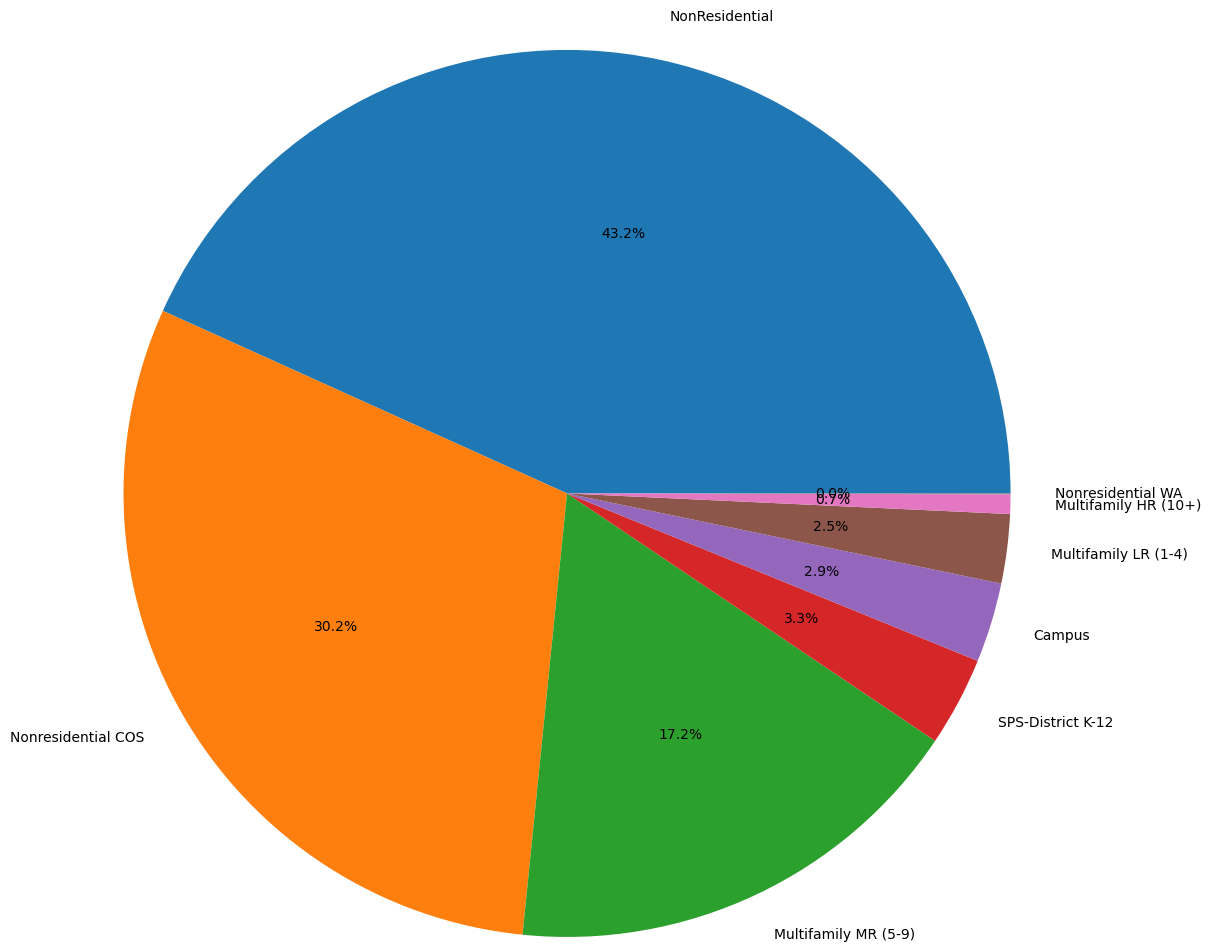

In [7]:
# plot des différents types de batîments

# 'autopct' pourcentage à un chiffre après la virgule
# 'radius' rayon du camembert
plt.pie(df.BuildingType.value_counts(), autopct = '%.1f%%', radius = 3, labels = ['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'])

# Affichage du plot
plt.show()

On constate qu'une majorité de bâtiments sont non résidentiels. 

In [8]:
# Supression des types des bâtiments de type résidentiel 
df=df[~df['BuildingType'].str.contains("Multifamily")]
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

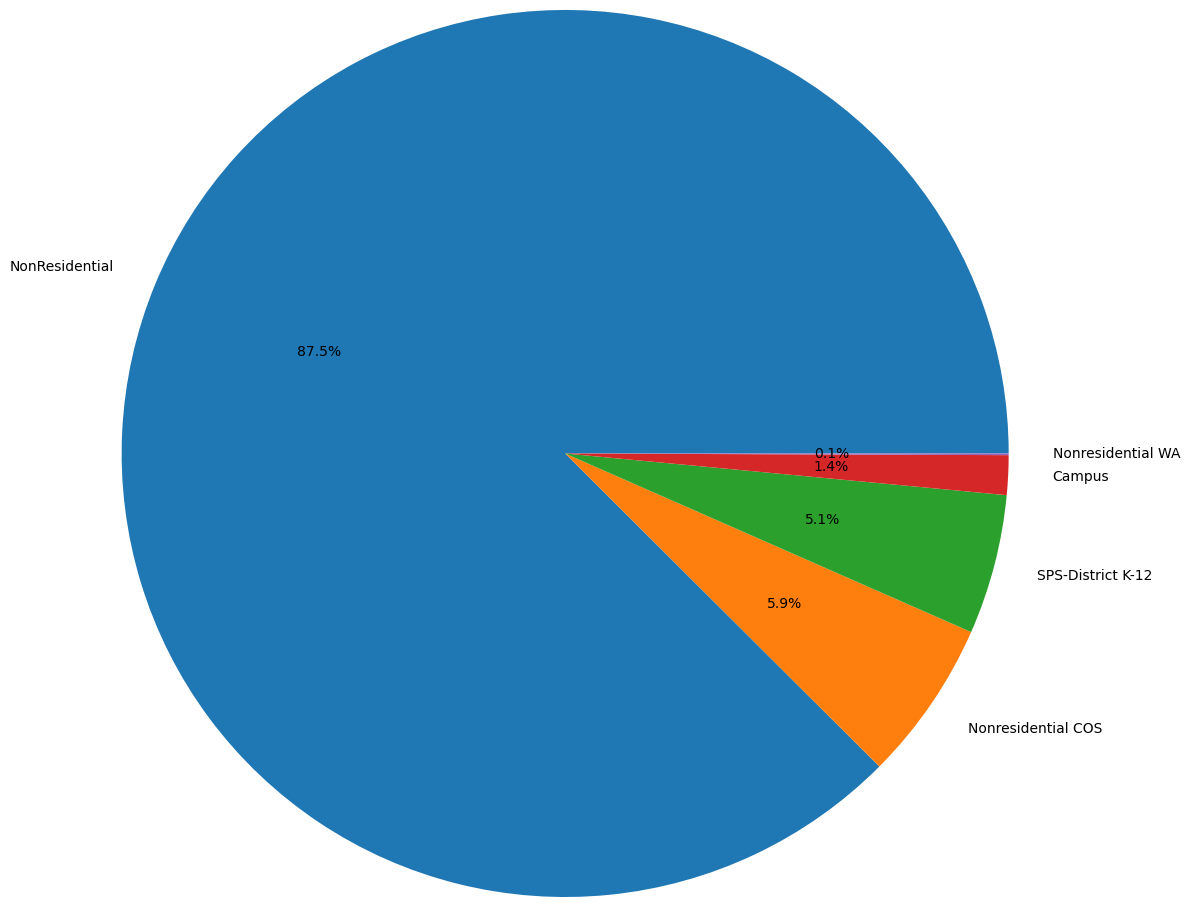

In [9]:
plt.pie(df.BuildingType.value_counts(), autopct = '%.1f%%', radius = 3, labels = ['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'])

# Affichage
plt.show()

La répartition des types de bâtiments non résidentiels sont représentés dans le camembert ci-dessus. 

In [10]:
df.shape

(1668, 46)

Il y a 1668 bâtiments non résidentiels. 



## Traitement des valeurs

<font color="#337da4"><h4>4.2 Traitement des outliers </h4><a class="anchor" id="section_4.2"></a>
</font>

In [12]:
df.isna().sum().sort_values(ascending=False)

Comments                           1668
Outlier                            1651
YearsENERGYSTARCertified           1570
ThirdLargestPropertyUseType        1315
ThirdLargestPropertyUseTypeGFA     1315
SecondLargestPropertyUseType        813
SecondLargestPropertyUseTypeGFA     813
ENERGYSTARScore                     574
ZipCode                              16
LargestPropertyUseType                6
LargestPropertyUseTypeGFA             6
SiteEUIWN(kBtu/sf)                    3
SiteEUI(kBtu/sf)                      3
SiteEnergyUseWN(kBtu)                 3
SteamUse(kBtu)                        2
SiteEnergyUse(kBtu)                   2
SourceEUIWN(kBtu/sf)                  2
SourceEUI(kBtu/sf)                    2
Electricity(kWh)                      2
Electricity(kBtu)                     2
NaturalGas(therms)                    2
NaturalGas(kBtu)                      2
TotalGHGEmissions                     2
GHGEmissionsIntensity                 2
NumberofBuildings                     2


In [13]:
# Fonction pour calculer le pourcentage de données manquantes avec classement en ordre décroissant 

def missing(data):
    products_dict = {}
    
    for col in data.columns:
        products_dict[col] = []
        products_dict[col].append(round((data[col].isnull().sum()/data.shape[0])*100,2))
        products_dict[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=products_dict, orient="index", columns = ["Pourcentage Valeurs Manquantes", "Nombre de valeurs manquantes"]).sort_values(by="Pourcentage Valeurs Manquantes", ascending=False)

#Application de la formule une première fois
missing(df)

Pourcentage Valeurs Manquantes  \
Comments                                                 100.00   
Outlier                                                   98.98   
YearsENERGYSTARCertified                                  94.12   
ThirdLargestPropertyUseType                               78.84   
ThirdLargestPropertyUseTypeGFA                            78.84   
SecondLargestPropertyUseType                              48.74   
SecondLargestPropertyUseTypeGFA                           48.74   
ENERGYSTARScore                                           34.41   
ZipCode                                                    0.96   
LargestPropertyUseType                                     0.36   
LargestPropertyUseTypeGFA                                  0.36   
SiteEUIWN(kBtu/sf)                                         0.18   
SiteEUI(kBtu/sf)                                           0.18   
SiteEnergyUseWN(kBtu)                                      0.18   
SteamUse(kBtu)                                             0.12   
SiteEnergyUse(kBtu)                                        0.12   
SourceEUIWN(kBtu/sf)                                       0.12   
SourceEUI(kBtu/sf)                                         0.12   
Electricity(kWh)                                           0.12   
Electricity(kBtu)                                          0.12   
NaturalGas(therms)                                         0.12   
NaturalGas(kBtu)                                           0.12   
TotalGHGEmissions                                          0.12   
GHGEmissionsIntensity                                      0.12   
NumberofBuildings                                          0.12   
ListOfAllPropertyUseTypes                                  0.12   
DataYear                                                   0.00   
TaxParcelIdentificationNumber                              0.00   
BuildingType                                               0.00   
PrimaryPropertyType                                        0.00   
ComplianceStatus                                           0.00   
PropertyName                                               0.00   
DefaultData                                                0.00   
Address                                                    0.00   
City                                                       0.00   
State                                                      0.00   
CouncilDistrictCode                                        0.00   
Neighborhood                                               0.00   
Latitude                                                   0.00   
Longitude                                                  0.00   
YearBuilt                                                  0.00   
NumberofFloors                                             0.00   
PropertyGFATotal                                           0.00   
PropertyGFAParking                                         0.00   
PropertyGFABuilding(s)                                     0.00   
OSEBuildingID                                              0.00   

                                 Nombre de valeurs manquantes  
Comments                                                 1668  
Outlier                                                  1651  
YearsENERGYSTARCertified                                 1570  
ThirdLargestPropertyUseType                              1315  
ThirdLargestPropertyUseTypeGFA                           1315  
SecondLargestPropertyUseType                              813  
SecondLargestPropertyUseTypeGFA                           813  
ENERGYSTARScore                                           574  
ZipCode                                                    16  
LargestPropertyUseType                                      6  
LargestPropertyUseTypeGFA                                   6  
SiteEUIWN(kBtu/sf)                                          3  
SiteEUI(kBtu/sf)                                   

<AxesSubplot:title={'center':'Proportion de valeurs manquantes par variable (%)'}>

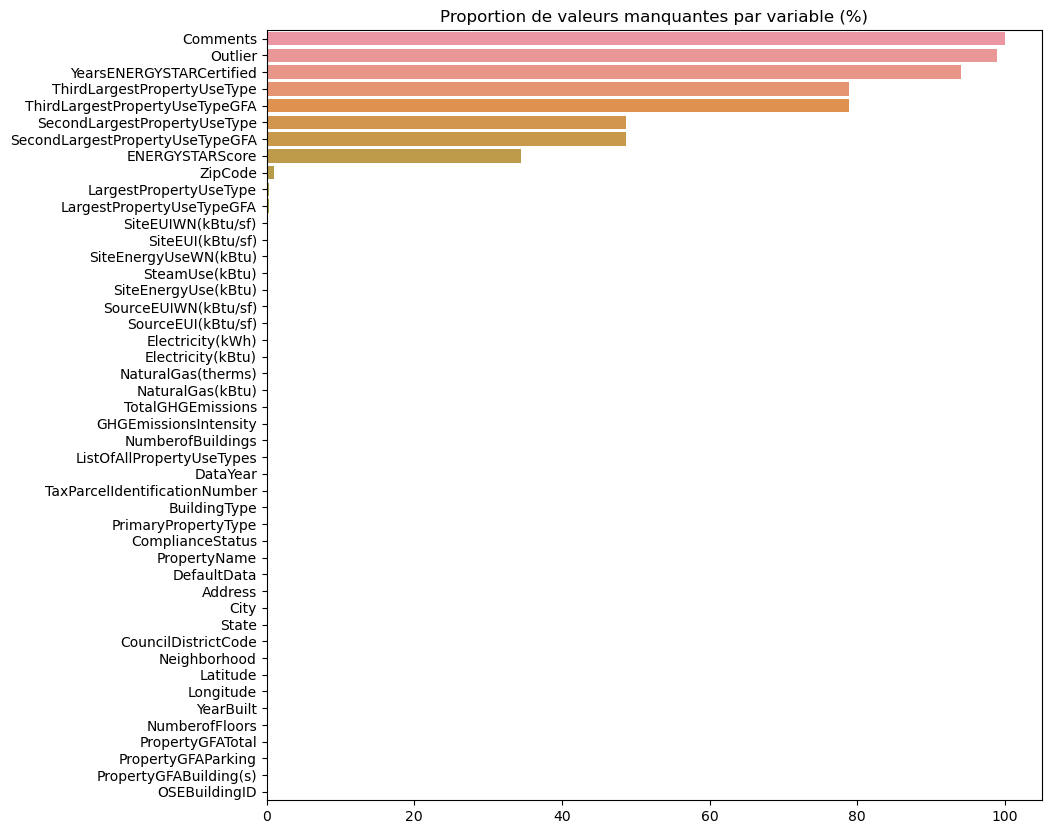

In [14]:
#Diagramme affichant la proportion de valeurs manquantes par variable
df_nan = df.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(10,10))
plt.title('Proportion de valeurs manquantes par variable (%)')
sns.barplot(x=df_nan.values/df.shape[0]*100, y=df_nan.index)

#### Analyse des features 'Outlier' et 'ComplianceStatus'

In [15]:
#Types d'outliers
df['Outlier'].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [16]:
high_outliers=df[(df["Outlier"]=="High outlier")]
print(f"Nombre d'observations : {high_outliers.shape[0]}")
print("Observations : ")
display(high_outliers.head())

Nombre d'observations : 2
Observations : 


OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
226            350      2016  NonResidential        Large Office   
517            704      2016  NonResidential        Large Office   

                   PropertyName              Address     City State  ZipCode  \
226  Second And Spring Building   1100 Second Avenue  Seattle    WA  98101.0   
517        401 Elliott Ave West  401 Elliot Ave West  Seattle    WA  98119.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode           Neighborhood  \
226                    0942000045                    7               DOWNTOWN   
517                    7666202110                    7  MAGNOLIA / QUEEN ANNE   

     Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
226  47.60642 -122.33581       1958                1.0               6   
517  47.62235 -122.36378       2000                1.0               4   

     PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
226            172842               25920                  146922   
517            129551               42500                   87051   

        ListOfAllPropertyUseTypes LargestPropertyUseType  \
226  Data Center, Office, Parking                 Office   
517  Data Center, Office, Parking                 Office   

     LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
226                    99890.0                  Data Center   
517                    82273.0                      Parking   

     SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
226                          39336.0                     Parking   
517                          42500.0                 Data Center   

     ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
226                         25000.0                      NaN              NaN   
517                          4778.0                      NaN              1.0   

     SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
226        297.399994          299.200012          909.599976   
517        311.700012          311.700012          978.900024   

     SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
226            911.500000           41399504.0             41650404.0   
517            978.900024           27137190.0             27137190.0   

     SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
226             0.0        11663150.0         39794668.0         16048.30957   
517             0.0         7953454.5         27137187.0             0.00000   

     NaturalGas(kBtu)  DefaultData  Comments ComplianceStatus       Outlier  \
226         1604831.0        False       NaN    Non-Compliant  High outlier   
517               0.0        False       NaN    Non-Compliant  High outlier   

     TotalGHGEmissions  GHGEmissionsIntensity  
226             362.66                   2.10  
517             189.18                   1.46

In [17]:
low_outliers=df[(df["Outlier"]=="Low outlier")]
print(f"Nombre d'observations : {low_outliers.shape[0]}")
print("Observations : ")
display(low_outliers.head())

Nombre d'observations : 15
Observations : 


OSEBuildingID  DataYear       BuildingType          PrimaryPropertyType  \
384             539      2016     NonResidential                 Retail Store   
448             608      2016     NonResidential                 Large Office   
839           19967      2016  SPS-District K-12                  K-12 School   
1045          20617      2016     NonResidential                 Retail Store   
1229          21315      2016     NonResidential  Small- and Mid-Sized Office   

                PropertyName                Address     City State  ZipCode  \
384        University Center  4501 Roosevelt Way NE  Seattle    WA  98105.0   
448   411 1ST AVE  S (ID608)          411 1ST AVE S  Seattle    WA  98104.0   
839           Queen Anne Gym         1431 2nd Ave N  Seattle    WA  98109.0   
1045   Seattle Habitat Store         21 S Nevada St  Seattle    WA  98134.0   
1229         1518 Fifith Ave         1520 Fifth Ave  Seattle    WA  98101.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
384                     5335200380                    4   
448                     5247800200                    2   
839                     0811000005                    7   
1045                    1824049074                    2   
1229                    1975700135                    7   

               Neighborhood  Latitude  Longitude  YearBuilt  \
384               NORTHEAST  47.66178 -122.31812       1987   
448                DOWNTOWN  47.59878 -122.33458       1913   
839   MAGNOLIA / QUEEN ANNE  47.63203 -122.35337       2001   
1045       GREATER DUWAMISH  47.56535 -122.34054       1953   
1229               DOWNTOWN  47.61119 -122.33581       1903   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
384                 1.0               2             69492                   0   
448                 5.0               7            154159                   0   
839                 1.0               1             35805                   0   
1045                1.0               1             39900                   0   
1229                1.0               3             57720                   0   

      PropertyGFABuilding(s)                 ListOfAllPropertyUseTypes  \
384                    69492                              Retail Store   
448                   154159                                    Office   
839                    35805                               K-12 School   
1045                   39900  Non-Refrigerated Warehouse, Retail Store   
1229                   57720                                    Office   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
384            Retail Store                    69800.0   
448                  Office                   193154.0   
839             K-12 School                    35805.0   
1045           Retail Store                    25000.0   
1229                 Office                    25000.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
384                         Other                              0.0   
448                           NaN                              NaN   
839                           NaN                              NaN   
1045   Non-Refrigerated Warehouse                          15000.0   
1229                          NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
384                          NaN                             NaN   
448                          NaN                             NaN   
839                          NaN                             NaN   
1045                         NaN                             NaN   
1229                         NaN                             NaN   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
384                       NaN            100.0               4.6   
448                       NaN            100.0              58.

In [18]:
outliers=df[(df["Outlier"].notnull())]
print(f"Nombre d'observations : {outliers.shape[0]}")
print("Observations : ")
display(outliers.head())

Nombre d'observations : 17
Observations : 


OSEBuildingID  DataYear       BuildingType PrimaryPropertyType  \
226            350      2016     NonResidential        Large Office   
384            539      2016     NonResidential        Retail Store   
448            608      2016     NonResidential        Large Office   
517            704      2016     NonResidential        Large Office   
839          19967      2016  SPS-District K-12         K-12 School   

                   PropertyName                Address     City State  \
226  Second And Spring Building     1100 Second Avenue  Seattle    WA   
384           University Center  4501 Roosevelt Way NE  Seattle    WA   
448      411 1ST AVE  S (ID608)          411 1ST AVE S  Seattle    WA   
517        401 Elliott Ave West    401 Elliot Ave West  Seattle    WA   
839              Queen Anne Gym         1431 2nd Ave N  Seattle    WA   

     ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
226  98101.0                    0942000045                    7   
384  98105.0                    5335200380                    4   
448  98104.0                    5247800200                    2   
517  98119.0                    7666202110                    7   
839  98109.0                    0811000005                    7   

              Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
226               DOWNTOWN  47.60642 -122.33581       1958                1.0   
384              NORTHEAST  47.66178 -122.31812       1987                1.0   
448               DOWNTOWN  47.59878 -122.33458       1913                5.0   
517  MAGNOLIA / QUEEN ANNE  47.62235 -122.36378       2000                1.0   
839  MAGNOLIA / QUEEN ANNE  47.63203 -122.35337       2001                1.0   

     NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
226               6            172842               25920   
384               2             69492                   0   
448               7            154159                   0   
517               4            129551               42500   
839               1             35805                   0   

     PropertyGFABuilding(s)     ListOfAllPropertyUseTypes  \
226                  146922  Data Center, Office, Parking   
384                   69492                  Retail Store   
448                  154159                        Office   
517                   87051  Data Center, Office, Parking   
839                   35805                   K-12 School   

    LargestPropertyUseType  LargestPropertyUseTypeGFA  \
226                 Office                    99890.0   
384           Retail Store                    69800.0   
448                 Office                   193154.0   
517                 Office                    82273.0   
839            K-12 School                    35805.0   

    SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
226                  Data Center                          39336.0   
384                        Other                              0.0   
448                          NaN                              NaN   
517                      Parking                          42500.0   
839                          NaN                              NaN   

    ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
226                     Parking                         25000.0   
384                         NaN                             NaN   
448                         NaN                             NaN   
517                 Data Center                          4778.0   
839                         NaN                             NaN   

    YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
226                      NaN              NaN        297.399994   
384                      NaN            100.0          4.600000   
448                      NaN            100.0         58.000000   
517                      NaN              1.0        311.700012   
839                

Effaçons les outliers : 

In [19]:
filtered_data=df.copy()
filtered_data.drop(axis=0, index=outliers.index, inplace=True)
filtered_data = filtered_data.reset_index(drop=True)
print(f"Nombre d'observations restantes: {filtered_data.shape[0]}")

Nombre d'observations restantes: 1651


In [20]:
#États du bâtiment : est-il en norme ? 
df['ComplianceStatus'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [21]:
#Observations hors norme
non_compliant=filtered_data[(filtered_data["ComplianceStatus"]=="Non-Compliant")]
print(f"Nombre d'observations : {non_compliant.shape[0]}")
print("Observations : ")
display(non_compliant.head())

Nombre d'observations : 3
Observations : 


OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
297             435      2016  NonResidential                        Other   
564             773      2016  NonResidential  Small- and Mid-Sized Office   
1408          26532      2016  NonResidential           Mixed Use Property   

                            PropertyName                 Address     City  \
297   Washington State Convention Center             705 Pike St  Seattle   
564                     SEATTLE BUILDING         215 COLUMBIA ST  Seattle   
1408                    KALBERG BUILDING  4515 UNIVERSITY WAY NE  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
297     WA  98101.0                    1978200105                    7   
564     WA  98104.0                    0939000245                    7   
1408    WA  98105.0                    8816401120                    4   

     Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
297      DOWNTOWN  47.61195 -122.33167       1990                1.0   
564      DOWNTOWN  47.60380 -122.33293       1924                NaN   
1408    NORTHEAST  47.66182 -122.31345       1928                NaN   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
297                6           1400000                   0   
564                4             63150                   0   
1408               2             20760                   0   

      PropertyGFABuilding(s)   ListOfAllPropertyUseTypes  \
297                  1400000  Convention Center, Parking   
564                    63150                         NaN   
1408                   20760                         NaN   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
297       Convention Center                  1072000.0   
564                     NaN                        NaN   
1408                    NaN                        NaN   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
297                       Parking                         686750.0   
564                           NaN                              NaN   
1408                          NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
297                          NaN                             NaN   
564                          NaN                             NaN   
1408                         NaN                             NaN   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
297                       NaN              NaN               NaN   
564                       NaN              NaN               NaN   
1408                      NaN              NaN               NaN   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
297                  0.0                 0.0                   0.0   
564                  NaN                 NaN                   NaN   
1408                 NaN                 NaN                   NaN   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
297                   0.0                    0.0             0.0   
564                   NaN                    NaN             NaN   
1408                  NaN                    NaN             NaN   

      Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
297                0.0                0.0                 0.0   
564                NaN                NaN                 NaN   
1408               NaN                NaN                 NaN   

      NaturalGas(kBtu)  DefaultData  Comments ComplianceStatus Outlier  \
297                0.0        False       NaN    Non-Compliant     NaN   
564                NaN        False       NaN    Non-Compliant     NaN   
1408               NaN        False       NaN    Non-Compliant     NaN   

      TotalGHGEmissions  GHGEmissionsIntensity  
297                 0.0                    0.0  
564                 NaN               

Effaçons les variables hors norme : 

In [22]:
filtered_data.drop(axis=0, index=non_compliant.index, inplace=True)
filtered_data = filtered_data.reset_index(drop=True)
print(f"Nombre d'observations restantes: {filtered_data.shape[0]}")

Nombre d'observations restantes: 1648


### Résumé du fichier

In [23]:
tableau_resume(filtered_data)

Nombre lignes  Nombre colonnes Taux remplissage moyen  Doublons
fichier           1648               46                  87.3%         0

**Le tableau a un taux de remplissage moyen de 87,3%. Supprimons les données qui ont que des valeurs manquantes.**

In [24]:
filtered_data.dropna(how = 'all', axis=0, inplace=True)
filtered_data.shape

(1648, 46)

<font color="#337da4"><h4>4.3 Traitement des valeurs manquantes </h4><a class="anchor" id="section_4.3"></a>
</font>

In [25]:
# Affichage du pourcentage de valeurs manquantes par variable
missing(filtered_data)

Pourcentage Valeurs Manquantes  \
Outlier                                                  100.00   
Comments                                                 100.00   
YearsENERGYSTARCertified                                  94.05   
ThirdLargestPropertyUseType                               78.70   
ThirdLargestPropertyUseTypeGFA                            78.70   
SecondLargestPropertyUseType                              48.60   
SecondLargestPropertyUseTypeGFA                           48.60   
ENERGYSTARScore                                           34.28   
ZipCode                                                    0.97   
LargestPropertyUseTypeGFA                                  0.24   
LargestPropertyUseType                                     0.24   
SiteEUIWN(kBtu/sf)                                         0.06   
SiteEnergyUseWN(kBtu)                                      0.06   
NaturalGas(kBtu)                                           0.00   
TotalGHGEmissions                                          0.00   
ComplianceStatus                                           0.00   
SiteEUI(kBtu/sf)                                           0.00   
SourceEUI(kBtu/sf)                                         0.00   
SourceEUIWN(kBtu/sf)                                       0.00   
SiteEnergyUse(kBtu)                                        0.00   
DefaultData                                                0.00   
Electricity(kWh)                                           0.00   
Electricity(kBtu)                                          0.00   
NaturalGas(therms)                                         0.00   
SteamUse(kBtu)                                             0.00   
OSEBuildingID                                              0.00   
DataYear                                                   0.00   
ListOfAllPropertyUseTypes                                  0.00   
BuildingType                                               0.00   
PrimaryPropertyType                                        0.00   
PropertyName                                               0.00   
Address                                                    0.00   
City                                                       0.00   
State                                                      0.00   
TaxParcelIdentificationNumber                              0.00   
CouncilDistrictCode                                        0.00   
Neighborhood                                               0.00   
Latitude                                                   0.00   
Longitude                                                  0.00   
YearBuilt                                                  0.00   
NumberofBuildings                                          0.00   
NumberofFloors                                             0.00   
PropertyGFATotal                                           0.00   
PropertyGFAParking                                         0.00   
PropertyGFABuilding(s)                                     0.00   
GHGEmissionsIntensity                                      0.00   

                                 Nombre de valeurs manquantes  
Outlier                                                  1648  
Comments                                                 1648  
YearsENERGYSTARCertified                                 1550  
ThirdLargestPropertyUseType                              1297  
ThirdLargestPropertyUseTypeGFA                           1297  
SecondLargestPropertyUseType                              801  
SecondLargestPropertyUseTypeGFA                           801  
ENERGYSTARScore                                           565  
ZipCode                                                    16  
LargestPropertyUseTypeGFA                                   4  
LargestPropertyUseType                                      4  
SiteEUIWN(kBtu/sf)                                          1  
SiteEnergyUseWN(kBtu)                              

Il y a 46 colonnes et 1668 observations.
<font color="#337da4"><h4>4.3 Tri des variables utiles </h4><a class="anchor" id="section_4.3"></a>
</font>

Plusieurs variables concernent les surfaces (GFA = Gross floor area) :

- Gross floor area : surface totale
- PropertyGFAParking : surface des parkings
- PropertyGFABuilding(s) : surface des bâtiments
- ListOfAllPropertyUseTypes : les différentes utilisations des surfaces (Hotel, Parking, Restaurant, Piscine, etc.)
- LargestPropertyUseType / LargestPropertyUseTypeGFA : principale destination du bâtiment et sa surface
- SecondLargestPropertyUseType / SecondLargestPropertyUseTypeGFA : seconde destination du bâtiment et sa surface
- ThirdLargestPropertyUseType / ThirdLargestPropertyUseTypeGFA : troisième destination du bâtiment et sa surface


Nous avons également plusieurs variables qui concernent la consommation de l'énergie : 

- SiteEUI(kBtu/sf) : Consommation d'énergie divisée par la surface du batîment. 
Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.

- SiteEUIWN(kBtu/sf)	
Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet). WN Site Energy is the Site Energy Use the property would have consumed during 30-year average weather conditions. WN Site EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.

Les suffixes WN : "Weather Normalized" - Ce sont les mesures normalisées avec les conditions climatiques. Dans le cadre de notre analyse, la météo ne rentrera pas en compte.

- SiteEnergyUse(kBtu) - **Consommation d'énergie annuelle (variable cible)** 

- SourceEUI(kBtu/sf)	
Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.

- SourceEUIWN(kBtu/sf)	
Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.

- SteamUse(kBtu)	
The annual amount of district steam consumed by the property on-site, measured in thousands of British thermal units (kBtu).


Autres paramètres :

- Electricity(kWh)	
The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh.

- Electricity(kBtu)	
The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).

- NaturalGas(therms)	
The annual amount of utility-supplied natural gas consumed by the property, measured in therms.

- NaturalGas(kBtu)	
The annual amount of utility-supplied natural gas consumed by the property, measured in thousands of British thermal units (kBtu).

Nous ne prendrons pas en compte ces paramètres pour éviter une fuite de données. 


Autres informations descriptives 
- DefaultData	
The property used default data for at least one property characteristic.

- Comments	
Comments by a building owner or agent to provide context to the building’s energy use.

Ces informations n'apporteront pas grand întérêt plus tard lors de la modélisation. 



Émissions de gaz à effet de serre/impact environmental 
- TotalGHGEmissions **(variable cible)**	
The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh until the 2016 factor is available. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.


- GHGEmissionsIntensity	
Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources


# Supression des colonnes 'Outlier' et 'Comments'

On a plus besoin des variables de 'outlier' et 'comments' pour effectuer la modélisation. On peut donc supprimer ces variables. 

In [26]:
filtered_data.drop(['Outlier', 'Comments'], axis=1, inplace=True)

In [27]:
filtered_data.shape

(1648, 44)

<font color="#337da4"><h4>5. Analyse des données et Feature Engineering </h4><a class="anchor" id="section_5"></a>
</font>

<font color="#337da4"><h4>5.1. Localisation et voisinage </h4><a class="anchor" id="section_5.1"></a>
</font>

# Localisation
Vérification que tous les bâtiments sont bien localisés dans Seattle : 

- Latitude 
- Longitude 
- Address

Voisinage : 

- Neighbourhood

In [28]:
import folium
map_osm = folium.Map()
map_osm = folium.Map(location=[filtered_data['Latitude'].mean(), filtered_data['Longitude'].mean()],zoom_start=11)
for i in range(0,len(filtered_data)):
    folium.Circle([filtered_data.iloc[i]['Latitude'],filtered_data.iloc[i]['Longitude']], 
                      popup=filtered_data.iloc[i]['Address'], radius =100).add_to(map_osm)
map_osm

Les baîments sont bien tous localisés à Seattle. 

## Voisinage

Vérifions les différents types de Neighbourhoods : 

In [29]:
filtered_data['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'Central', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [30]:
filtered_data['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
filtered_data['Neighborhood']=filtered_data['Neighborhood'].map(lambda x: x.upper())

In [31]:
filtered_data['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE'], dtype=object)

In [32]:
# BAR PLOT
# Fonction qui créer des barplots pour chaque catégorie

def bar_perc(data, z,x,y):
    
    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (x, y))
    
    # plt.xticks(rotation = 45)
    
    ax = sns.countplot(data[z], palette = 'Paired')
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        
        x = p.get_x() + p.get_width() / 2 - 0.5                   # Width of the plot
        
        y = p.get_y() + p.get_height()                              # Height of the plot
        
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
        
    plt.show()                                                      # Display the plot

C:\Users\kherm\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


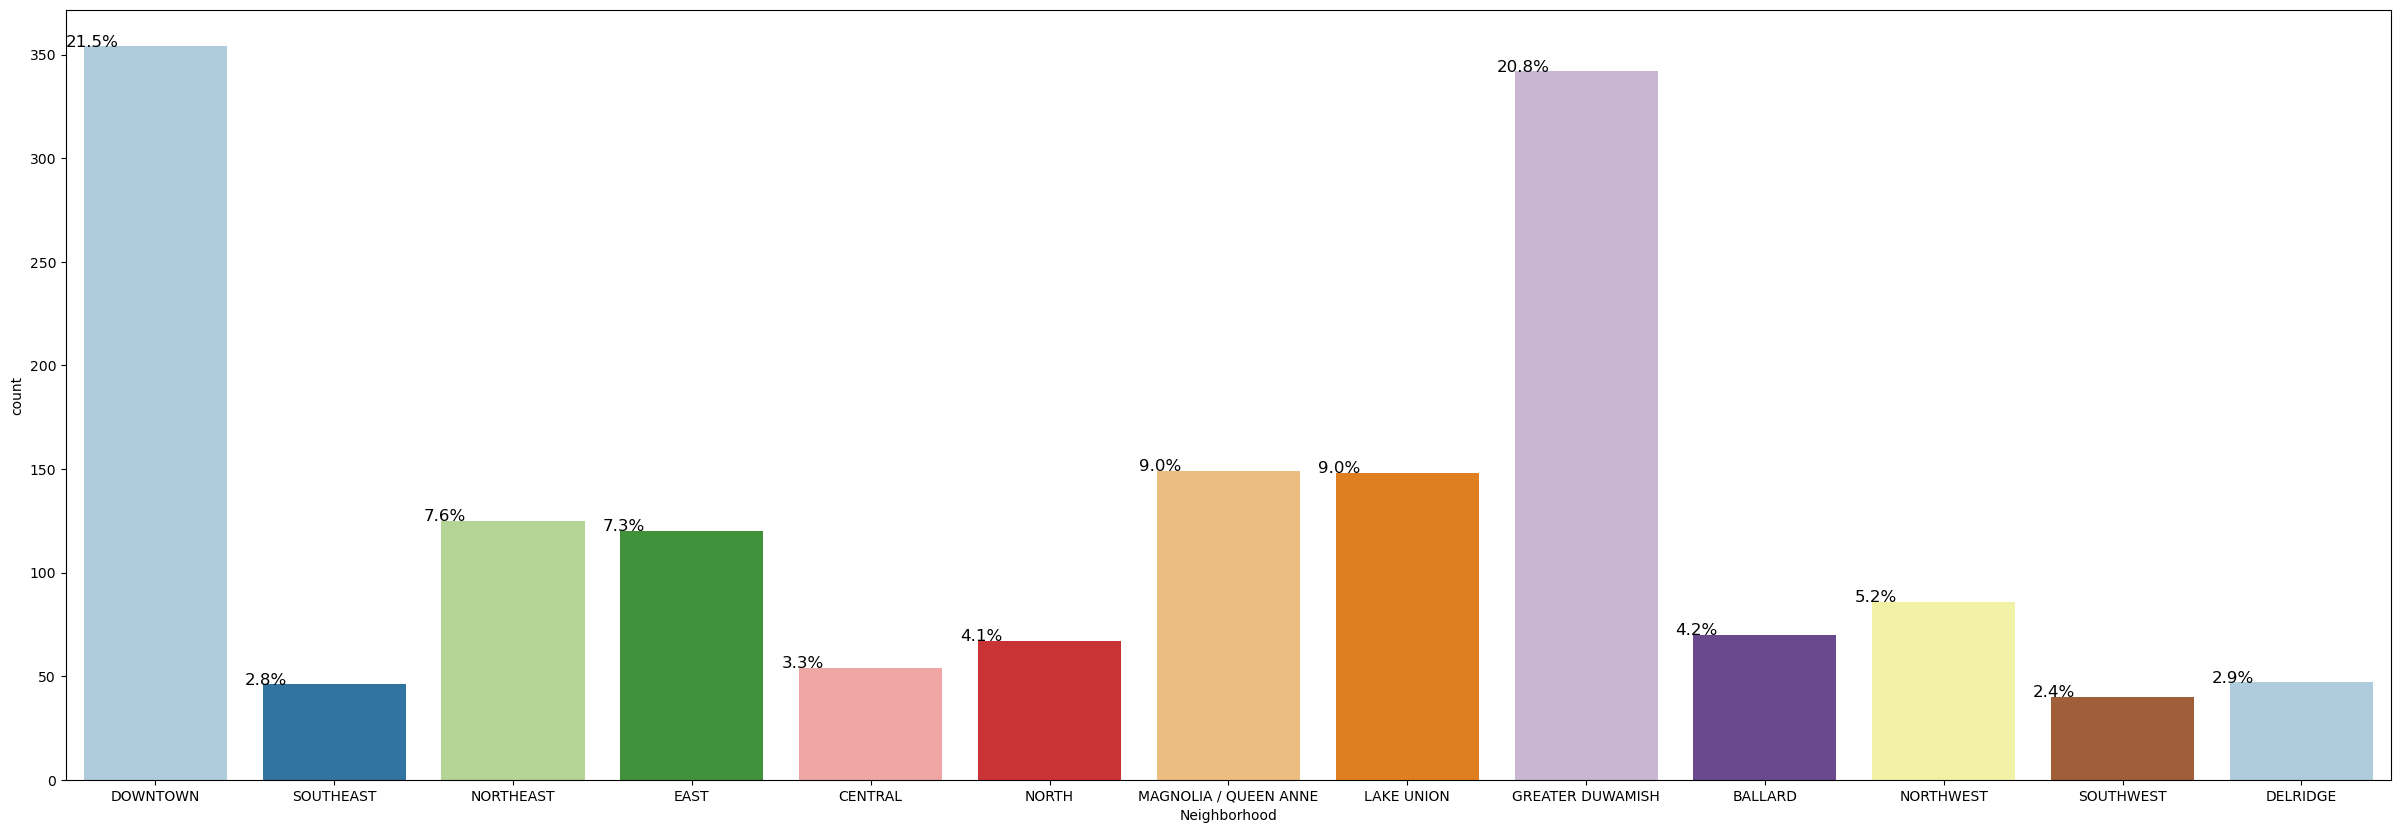

In [34]:
bar_perc(filtered_data, 'Neighborhood',30,10)

##  Council District Code

In [35]:
filtered_data['CouncilDistrictCode'].unique()

array([7, 3, 2, 4, 5, 6, 1], dtype=int64)

C:\Users\kherm\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


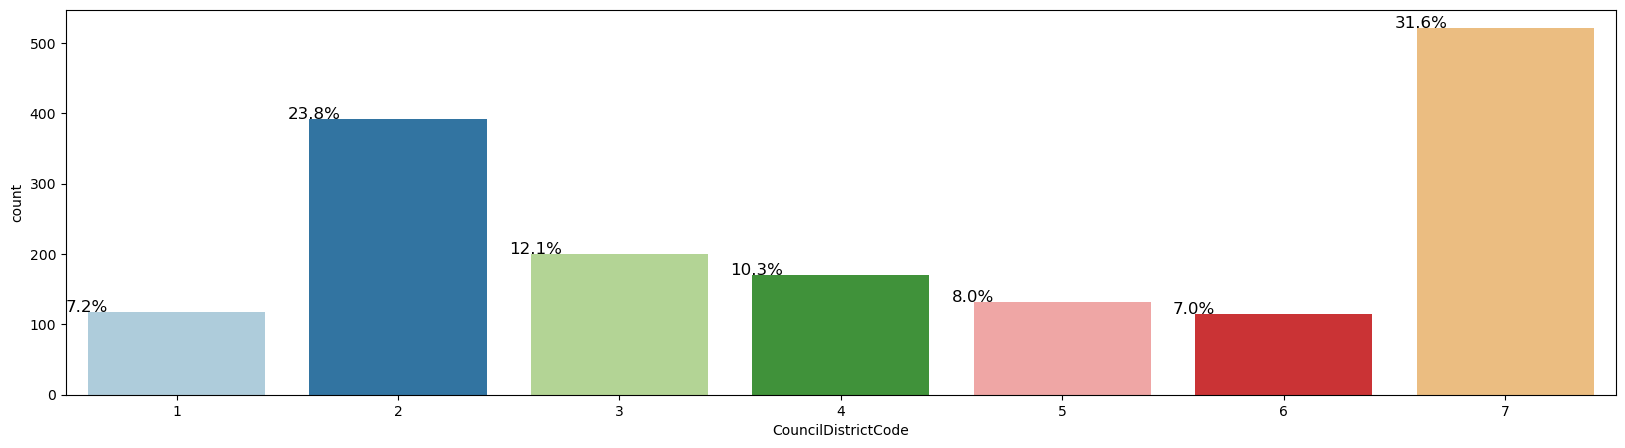

In [36]:
bar_perc(filtered_data, 'CouncilDistrictCode',20,5)

## State and City

In [48]:
filtered_data['State'].unique()

array(['WA'], dtype=object)

In [38]:
filtered_data['City'].unique()

array(['Seattle'], dtype=object)

Toutes les données sont bien rensignées en terme d'état d'appartenance et de ville. 

## Address

In [39]:
filtered_data['Address'].nunique()

1627

In [40]:
filtered_data.shape

(1648, 44)

In [41]:
filtered_data[filtered_data.duplicated(subset='Address',keep='first')]

OSEBuildingID  DataYear        BuildingType  \
135             224      2016      NonResidential   
156             248      2016  Nonresidential COS   
341             491      2016      NonResidential   
566             779      2016      NonResidential   
571             785      2016  Nonresidential COS   
648           19654      2016      NonResidential   
951           21794      2016      NonResidential   
1110          23835      2016      NonResidential   
1137          23975      2016  Nonresidential COS   
1138          23976      2016  Nonresidential COS   
1223          24537      2016      NonResidential   
1224          24538      2016      NonResidential   
1225          24539      2016      NonResidential   
1239          24601      2016      NonResidential   
1247          24636      2016      NonResidential   
1248          24640      2016      NonResidential   
1280          24896      2016      NonResidential   
1565          49687      2016      NonResidential   
1591          49850      2016      NonResidential   
1592          49862      2016  Nonresidential COS   
1632          50196      2016  Nonresidential COS   

              PrimaryPropertyType                          PropertyName  \
135                  Retail Store         Westwood Village - Building B   
156                     Warehouse                    SCL SSC Building B   
341   Small- and Mid-Sized Office                           South Tower   
566                  Large Office               Administration Building   
571                         Other              Airport Way Ctr - Bldg A   
648                    Laboratory                        1100 Olive Lab   
951                   K-12 School                                Peyton   
1110  Small- and Mid-Sized Office  South Seattle Business Park - Bldg B   
1137                    Warehouse              Airport Way Ctr - Bldg D   
1138           Mixed Use Property              Airport Way Ctr - Bldg E   
1223                    Warehouse   Cloverdale Business Park Building B   
1224                    Warehouse   Cloverdale Business Park Building C   
1225                    Warehouse   Cloverdale Business Park Building E   
1239  Small- and Mid-Sized Office                    Navos Erlick Perez   
1247                 Retail Store         Westwood Village - Building E   
1248                 Retail Store         Westwood Village - Building F   
1280                 Retail Store                     Promenade South 2   
1565  Supermarket / Grocery Store                Safeway 1885 - 1st Ave   
1591                  K-12 School          Paul G Allen Athletic Center   
1592                        Other                SCT Technical Pavilion   
1632           Mixed Use Property            Northgate Community Center   

                           Address     City State  ZipCode  \
135              2600 SW Barton St  Seattle    WA  98126.0   
156                 3613 4th Ave S  Seattle    WA  98134.0   
341              100 West Harrison  Seattle    WA  98119.0   
566                    500 5TH AVE  Seattle    WA  98104.0   
571             2203 Airport Way S  Seattle    WA  98134.0   
648                 1100 Olive Way  Seattle    WA  98101.0   
951             2400 11th Ave East  Seattle    WA  98102.0   
1110  4636 East Marginal Way South  Seattle    WA  98134.0   
1137            2203 Airport Way S  Seattle    WA  98134.0   
1138            2203 Airport Way S  Seattle    WA  98134.0   
1223   309 South Cloverdale Street  Seattle    WA  98108.0   
1224   309 South Cloverdale Street  Seattle    WA  98108.0   
1225   309 South Cloverdale Street  Seattle    WA  98108.0   
1239             2600 SW Holden St  Seattle    WA  98126.0   
1247             2600 SW Barton St  Seattle    WA  98126.0   
1248             2600 SW Barton St  Seattle    WA  98126.0   
1280             2309 S Jackson St  Seattle    WA  98144.0   
1565                 516 1st Ave W  Seattle    WA  98119.0   
1591      

Ce sont des types de bâtiments différents sur la même adresse. On peut conserver les données. 

## ZipCode

In [42]:
filtered_data['ZipCode'].unique()

array([98101., 98121., 98104., 98154., 98118., 98105., 98112., 98125.,
       98109., 98070., 98108., 98199., 98115., 98107., 98144., 98103.,
       98119., 98136., 98122., 98126., 98133., 98146., 98033., 98106.,
       98111., 98134., 98117., 98116., 98191., 98164., 98195., 98185.,
       98181., 98102., 98168., 98155., 98006., 98124., 98053., 98013.,
       98178., 98114., 98165., 98011., 98113., 98177., 98020., 98145.,
          nan])

Remplacer les valeurs manquantes par 'Unknown' :

In [43]:
filtered_data['ZipCode'] = filtered_data['ZipCode'].fillna('Unknown')

C:\Users\kherm\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


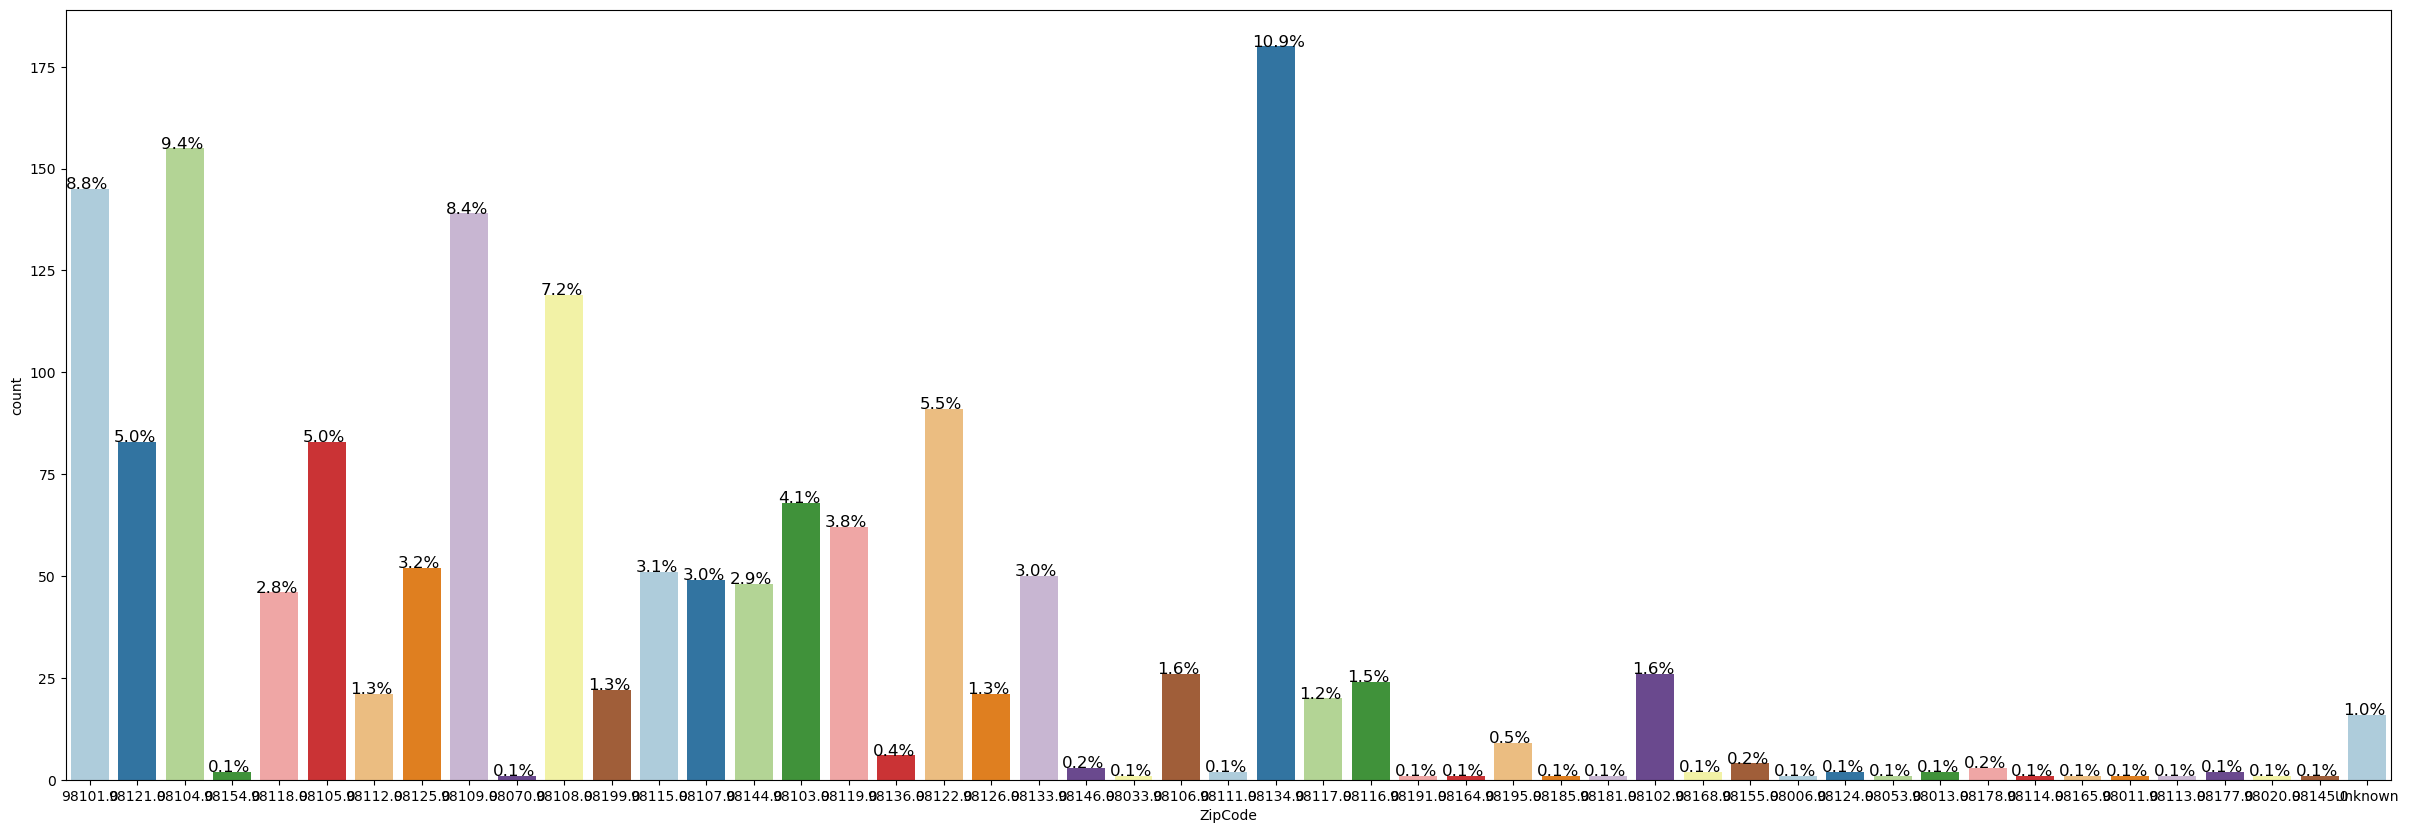

In [44]:
bar_perc(filtered_data, 'ZipCode',30,10)

<font color="#337da4"><h4>5.2 Energy Star Score</h4><a class="anchor" id="section_5.2"></a>
</font>

## ENERGYSTARScore

In [45]:
filtered_data['ENERGYSTARScore'].unique()

array([ 60.,  61.,  43.,  56.,  75.,  nan,  27.,  30.,  36.,  48.,  58.,
        35.,  31.,  39.,  76.,  95.,  84.,  57.,  29.,   8.,  97.,  88.,
        83.,  67.,  78.,  14.,  71.,  63.,  98.,  99.,  86.,  80.,  81.,
        94.,  54.,   1.,  74.,  96.,  37.,  91.,  93.,  68.,  53.,  34.,
       100.,  89.,  92.,  90.,  79.,  21.,  10.,  72.,  87.,  70.,  64.,
        49.,  62.,  46.,  42.,  77.,  20.,  85.,  66.,  69.,  28.,  65.,
         3.,  45.,   2.,  55.,  25.,   6.,  59.,  19.,   7.,   5.,  23.,
        38.,  73.,  33.,  26.,  41.,  32.,  82.,  15.,  16.,  50.,  12.,
        51.,  13.,  11.,  47.,  18.,  24.,  17.,  52.,  44.,   4.,  40.,
        22.,   9.])

C:\Users\kherm\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


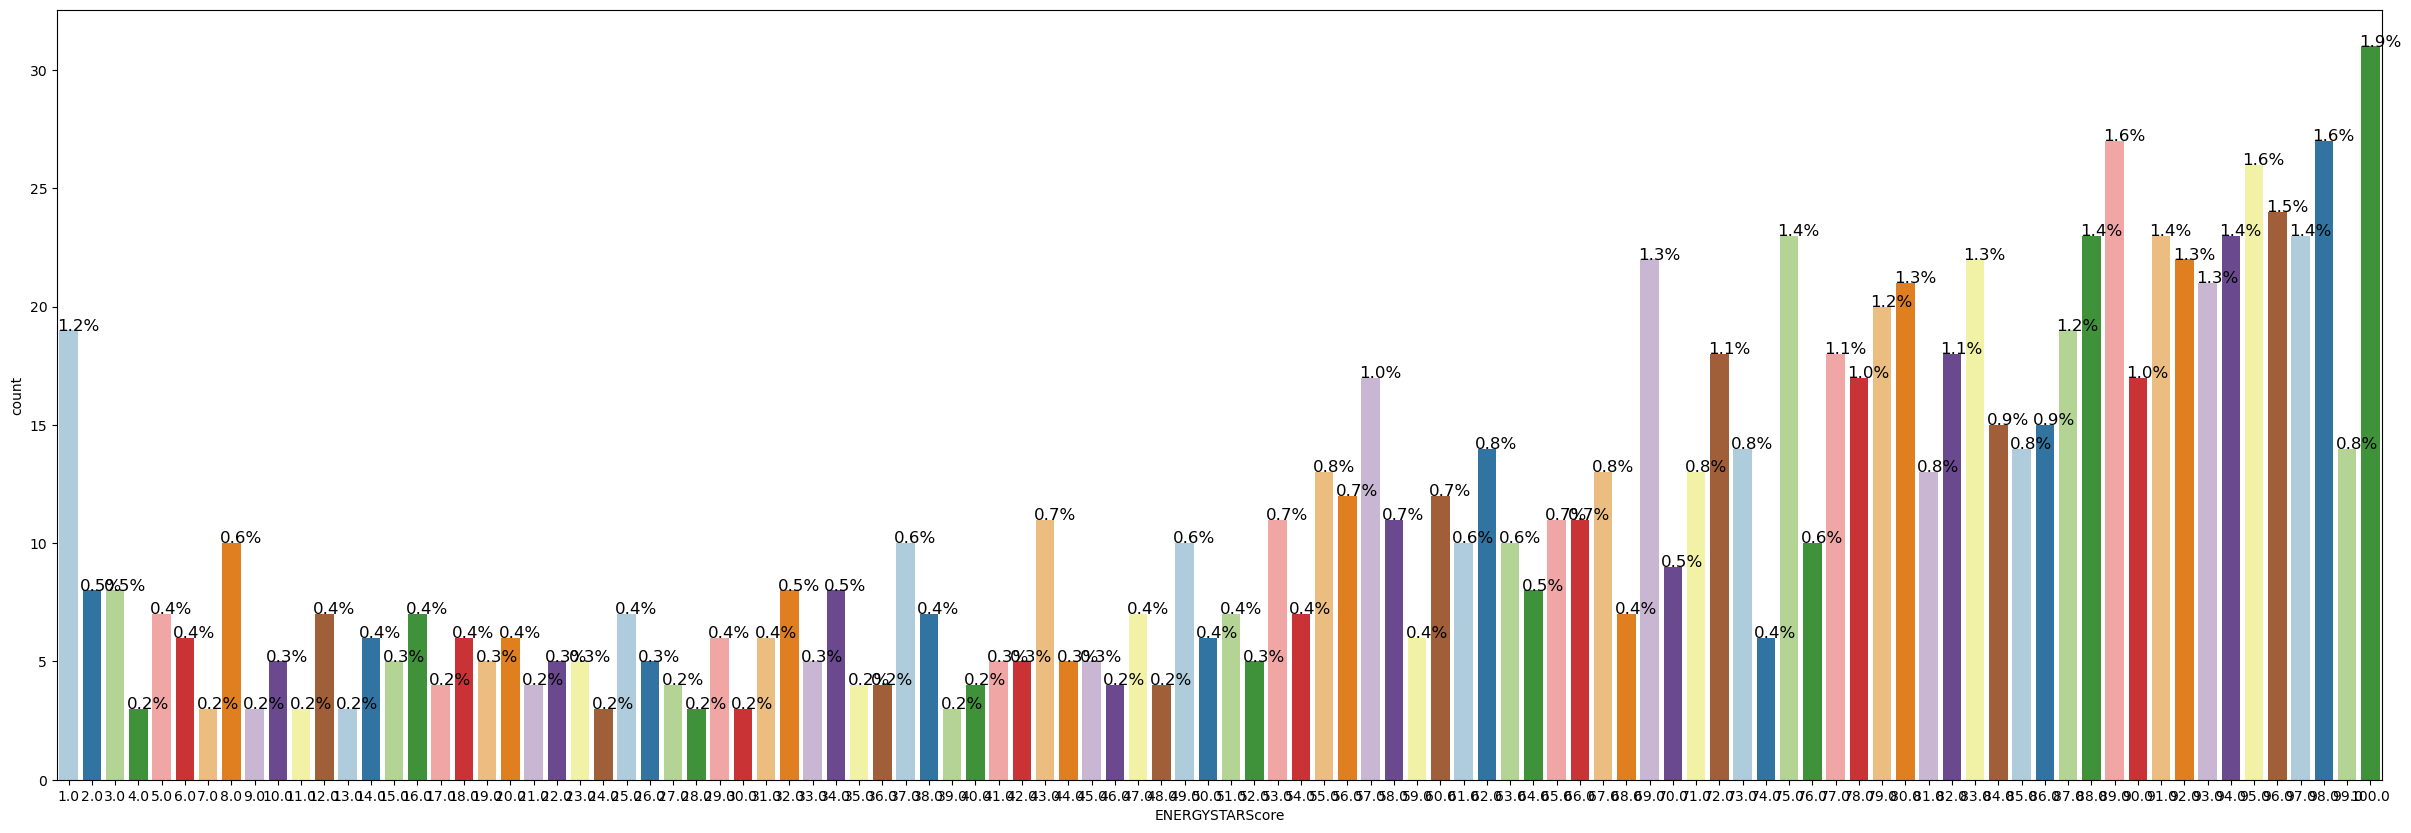

In [46]:
bar_perc(filtered_data, 'ENERGYSTARScore',30,10)

In [47]:
energy_null=filtered_data[(filtered_data["ENERGYSTARScore"].isna())
                             ] 
print(f"Nombre d'observations avec toutes les valeurs d'énergies score absentes : {energy_null.shape[0]}")
print("5 premières valeurs manquantes: ")
display(energy_null.head())

Nombre d'observations avec toutes les valeurs d'énergies score absentes : 565
5 premières valeurs manquantes: 


OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
5               9      2016  Nonresidential COS               Other   
7              11      2016      NonResidential               Other   
14             21      2016  Nonresidential COS               Other   
15             22      2016      NonResidential               Other   
17             24      2016      NonResidential  Mixed Use Property   

                                    PropertyName             Address     City  \
5                                  West Precinct     810 Virginia St  Seattle   
7                              Paramount Theatre         911 Pine St  Seattle   
14  The Seattle Public Library - Central Library  1000 Fourth Avenue  Seattle   
15                         Downtown Seattle YMCA      909 4th Avenue  Seattle   
17                              The Rainier Club        820 4th Ave.  Seattle   

   State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
5     WA  98101.0                    0660000560                    7   
7     WA  98101.0                    0660000955                    7   
14    WA  98154.0                    0942000275                    7   
15    WA  98104.0                    0942000350                    7   
17    WA  98104.0                    0942000510                    7   

   Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
5      DOWNTOWN  47.61623 -122.33657       1999                1.0   
7      DOWNTOWN  47.61327 -122.33136       1926                1.0   
14     DOWNTOWN  47.60649 -122.33297       2004                1.0   
15     DOWNTOWN  47.60546 -122.33279       1930                1.0   
17     DOWNTOWN  47.60515 -122.33159       1907                1.0   

    NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
5                2             97288               37198   
7                8            102761                   0   
14              11            412000               57000   
15               6            103911                   0   
17               5             57452                   0   

    PropertyGFABuilding(s)                          ListOfAllPropertyUseTypes  \
5                    60090                                     Police Station   
7                   102761              Other - Entertainment/Public Assembly   
14                  355000                      Data Center, Library, Parking   
15                  103911  Fitness Center/Health Club/Gym, Office, Swimmi...   
17                   57452  Office, Other, Other - Lodging/Residential, Re...   

                   LargestPropertyUseType  LargestPropertyUseTypeGFA  \
5                          Police Station                    88830.0   
7   Other - Entertainment/Public Assembly                   102761.0   
14                                Library                   364913.0   
15         Fitness Center/Health Club/Gym                    90000.0   
17                    Social/Meeting Hall                    16442.0   

   SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
5                           NaN                              NaN   
7                           NaN                              NaN   
14                      Parking                          49000.0   
15                       Office                          40000.0   
17                   Restaurant                          15505.0   

   ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
5                          NaN                             NaN   
7                          NaN                             NaN   
14                 Data Center                          1074.0   
15               Swimming Pool                             0.0   
17                      Office                          9741.0   

   YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
5                       NaN              NaN        136.100006   
7                

On conservera les données avec ces valeurs manquantes et on va séparer lors du processus de machine learning. 

<font color="#337da4"><h4>5.3 Analyse des autres variables numériques </h4><a class="anchor" id="section_5.3"></a>
</font>

# Site Energy Use

In [49]:
SiteEUIWN_null=filtered_data[(filtered_data["SiteEUIWN(kBtu/sf)"].isna())
                             ] 
print(f"Nombre d'observations avec toutes les valeurs d'énergies score absentes : {SiteEUIWN_null.shape[0]}")
print("5 premières valeurs manquantes: ")
display(SiteEUIWN_null.head())

Nombre d'observations avec toutes les valeurs d'énergies score absentes : 1
5 premières valeurs manquantes: 


OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
548            757      2016  NonResidential        Large Office   

                                PropertyName              Address     City  \
548  Market Place I & II-2003 Western Avenue  2003 Western Avenue  Seattle   

    State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
548    WA  98121.0                    1977200280                    7   

    Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
548     DOWNTOWN  47.61051 -122.34439       1979                1.0   

     NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
548               7            131143               87160   

     PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
548                   43983      Office, Retail Store                 Office   

     LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
548                   120248.0                 Retail Store   

     SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
548                          10853.0                         NaN   

     ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
548                             NaN                      NaN             93.0   

     SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
548              39.5                 NaN               128.0   

     SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
548                   0.0            5177270.5                    NaN   

     SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
548             0.0        1427645.25          4871126.0         14160.40918   

     NaturalGas(kBtu)  DefaultData ComplianceStatus  TotalGHGEmissions  \
548         1416041.0        False        Compliant             109.16   

     GHGEmissionsIntensity  
548                   0.83

In [50]:
filtered_data.drop(axis=0, index=SiteEUIWN_null.index, inplace=True)
filtered_data = filtered_data.reset_index(drop=True)
print(f"Nombre d'observations restantes: {filtered_data.shape[0]}")

Nombre d'observations restantes: 1647


# Types de Proriétés et Variables de Surface

Plusieurs variables concernent les surfaces (GFA = Gross floor area) :

- Gross floor area : surface totale
- PropertyGFAParking : surface des parkings
- PropertyGFABuilding(s) : surface des bâtiments
- ListOfAllPropertyUseTypes : les différentes utilisations des surfaces (Hotel, Parking, Restaurant, Piscine, etc.)
- LargestPropertyUseType / LargestPropertyUseTypeGFA : principale destination du bâtiment et sa surface
- SecondLargestPropertyUseType / SecondLargestPropertyUseTypeGFA : seconde destination du bâtiment et sa surface
- ThirdLargestPropertyUseType / ThirdLargestPropertyUseTypeGFA : troisième destination du bâtiment et sa surface

Remplacement par 0 pour secondaire et tertiaire.


In [51]:
filtered_data['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office'], dtype=object)

In [52]:
filtered_data['ListOfAllPropertyUseTypes'].unique()

array(['Hotel', 'Hotel, Parking, Restaurant',
       'Hotel, Parking, Swimming Pool', 'Police Station',
       'Other - Entertainment/Public Assembly', 'Hotel, Parking',
       'Data Center, Library, Parking',
       'Fitness Center/Health Club/Gym, Office, Swimming Pool',
       'Office, Other, Other - Lodging/Residential, Restaurant, Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership',
       'Hotel, Parking, Retail Store, Swimming Pool',
       'K-12 School, Multifamily Housing, Office, Other - Entertainment/Public Assembly',
       'Self-Storage Facility',
       'Energy/Power Station, Laboratory, Manufacturing/Industrial Plant, Non-Refrigerated Warehouse, Office',
       'Non-Refrigerated Warehouse, Office, Refrigerated Warehouse',
       'Non-Refrigerated Warehouse, Office', 'Office, Other - Education',
       'Office, Self-Storage Facility, Vocational School',
       'Data Center, Office, Retail Store',
       '

In [53]:
NumberofBuildings_null=filtered_data[(filtered_data["NumberofBuildings"].isna())] 
print(f"Nombre d'observations avec les valeurs absentes : {NumberofBuildings_null.shape[0]}")
print("Valeurs manquantes : ")
display(NumberofBuildings_null.head())

Nombre d'observations avec les valeurs absentes : 0
Valeurs manquantes : 


Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), DefaultData, ComplianceStatus, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

In [54]:
filtered_data.loc[(pd.isnull(filtered_data.LargestPropertyUseType)), 'LargestPropertyUseType'] = filtered_data.PrimaryPropertyType

In [55]:
filtered_data.loc[(pd.isnull(filtered_data.LargestPropertyUseTypeGFA)), 'LargestPropertyUseTypeGFA'] = filtered_data.PropertyGFATotal 

In [56]:
LargestPropertyUseType_null=filtered_data[(filtered_data["LargestPropertyUseType"].isna())] 
print(f"Nombre d'observations avec les valeurs absentes : {LargestPropertyUseType_null.shape[0]}")
print("Valeurs manquantes : ")
display(LargestPropertyUseType_null.head())

Nombre d'observations avec les valeurs absentes : 0
Valeurs manquantes : 


Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), DefaultData, ComplianceStatus, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

In [57]:
SecondLargestPropertyUseType_null=filtered_data[(filtered_data["SecondLargestPropertyUseType"].isna()) & (filtered_data["NumberofBuildings"]==1.0)] 
print(f"Nombre d'observations avec les valeurs absentes : {SecondLargestPropertyUseType_null.shape[0]}")
print("Valeurs manquantes : ")
display(SecondLargestPropertyUseType_null.head())

Nombre d'observations avec les valeurs absentes : 749
Valeurs manquantes : 


OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0              1      2016      NonResidential               Hotel   
2              3      2016      NonResidential               Hotel   
3              5      2016      NonResidential               Hotel   
5              9      2016  Nonresidential COS               Other   
6             10      2016      NonResidential               Hotel   

              PropertyName          Address     City State  ZipCode  \
0     Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
2  5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
5            West Precinct  810 Virginia St  Seattle    WA  98101.0   
6                   Camlin  1619 9th Avenue  Seattle    WA  98101.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
5                    0660000560                    7     DOWNTOWN  47.61623   
6                    0660000825                    7     DOWNTOWN  47.61390   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
5 -122.33657       1999                1.0               2             97288   
6 -122.33283       1926                1.0              11             83008   

   PropertyGFAParking  PropertyGFABuilding(s) ListOfAllPropertyUseTypes  \
0                   0                   88434                     Hotel   
2              196718                  759392                     Hotel   
3                   0                   61320                     Hotel   
5               37198                   60090            Police Station   
6                   0                   83008                     Hotel   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
5         Police Station                    88830.0   
6                  Hotel                    81352.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
5                          NaN                              NaN   
6                          NaN                              NaN   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
2                         NaN                             NaN   
3                         NaN                             NaN   
5                         NaN                             NaN   
6                         NaN                             NaN   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
5                      NaN              NaN        136.100006   
6                      NaN             27.0         70.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
2           97.699997          241.899994            244.100006   
3          113.300003          

In [58]:
filtered_data['SecondLargestPropertyUseType'] = filtered_data['SecondLargestPropertyUseType'].fillna('Not applicable')
filtered_data['SecondLargestPropertyUseTypeGFA'] = filtered_data['SecondLargestPropertyUseTypeGFA'].fillna(0)

In [59]:
SecondLargestPropertyUseType_2_null=filtered_data[(filtered_data["SecondLargestPropertyUseType"].isna())] 
print(f"Nombre d'observations avec les valeurs absentes : {SecondLargestPropertyUseType_2_null.shape[0]}")
print("Valeurs manquantes : ")
display(SecondLargestPropertyUseType_2_null.head())

Nombre d'observations avec les valeurs absentes : 0
Valeurs manquantes : 


Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), DefaultData, ComplianceStatus, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

In [60]:
ThirdLargestPropertyUseType_null=filtered_data[(filtered_data["ThirdLargestPropertyUseType"].isna()) & (filtered_data["NumberofBuildings"]==1.0)] 
print(f"Nombre d'observations avec les valeurs absentes : {ThirdLargestPropertyUseType_null.shape[0]}")
print("Valeurs manquantes : ")
display(ThirdLargestPropertyUseType_null.head())

Nombre d'observations avec les valeurs absentes : 1220
Valeurs manquantes : 


OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0              1      2016      NonResidential               Hotel   
2              3      2016      NonResidential               Hotel   
3              5      2016      NonResidential               Hotel   
5              9      2016  Nonresidential COS               Other   
6             10      2016      NonResidential               Hotel   

              PropertyName          Address     City State  ZipCode  \
0     Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
2  5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
5            West Precinct  810 Virginia St  Seattle    WA  98101.0   
6                   Camlin  1619 9th Avenue  Seattle    WA  98101.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
5                    0660000560                    7     DOWNTOWN  47.61623   
6                    0660000825                    7     DOWNTOWN  47.61390   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
5 -122.33657       1999                1.0               2             97288   
6 -122.33283       1926                1.0              11             83008   

   PropertyGFAParking  PropertyGFABuilding(s) ListOfAllPropertyUseTypes  \
0                   0                   88434                     Hotel   
2              196718                  759392                     Hotel   
3                   0                   61320                     Hotel   
5               37198                   60090            Police Station   
6                   0                   83008                     Hotel   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
5         Police Station                    88830.0   
6                  Hotel                    81352.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0               Not applicable                              0.0   
2               Not applicable                              0.0   
3               Not applicable                              0.0   
5               Not applicable                              0.0   
6               Not applicable                              0.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
2                         NaN                             NaN   
3                         NaN                             NaN   
5                         NaN                             NaN   
6                         NaN                             NaN   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
5                      NaN              NaN        136.100006   
6                      NaN             27.0         70.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
2           97.699997          241.899994            244.100006   
3          113.300003          

In [61]:
filtered_data['ThirdLargestPropertyUseType'] = filtered_data['ThirdLargestPropertyUseType'].fillna('Not applicable')
filtered_data['ThirdLargestPropertyUseTypeGFA'] = filtered_data['ThirdLargestPropertyUseTypeGFA'].fillna(0)

In [62]:
ThirdLargestPropertyUseType_2_null=filtered_data[(filtered_data["ThirdLargestPropertyUseType"].isna()) & (filtered_data["NumberofBuildings"]==2.0)] 
print(f"Nombre d'observations avec les valeurs absentes : {ThirdLargestPropertyUseType_2_null.shape[0]}")
print("Valeurs manquantes : ")
display(ThirdLargestPropertyUseType_2_null.head())

Nombre d'observations avec les valeurs absentes : 0
Valeurs manquantes : 


Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), DefaultData, ComplianceStatus, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

In [63]:
missing(filtered_data)

Pourcentage Valeurs Manquantes  \
YearsENERGYSTARCertified                                  94.05   
ENERGYSTARScore                                           34.30   
OSEBuildingID                                              0.00   
DataYear                                                   0.00   
SecondLargestPropertyUseTypeGFA                            0.00   
ThirdLargestPropertyUseType                                0.00   
ThirdLargestPropertyUseTypeGFA                             0.00   
SiteEUI(kBtu/sf)                                           0.00   
SiteEUIWN(kBtu/sf)                                         0.00   
SourceEUI(kBtu/sf)                                         0.00   
SourceEUIWN(kBtu/sf)                                       0.00   
SiteEnergyUse(kBtu)                                        0.00   
SiteEnergyUseWN(kBtu)                                      0.00   
SteamUse(kBtu)                                             0.00   
Electricity(kWh)                                           0.00   
Electricity(kBtu)                                          0.00   
NaturalGas(therms)                                         0.00   
NaturalGas(kBtu)                                           0.00   
DefaultData                                                0.00   
ComplianceStatus                                           0.00   
TotalGHGEmissions                                          0.00   
SecondLargestPropertyUseType                               0.00   
LargestPropertyUseTypeGFA                                  0.00   
LargestPropertyUseType                                     0.00   
CouncilDistrictCode                                        0.00   
BuildingType                                               0.00   
PrimaryPropertyType                                        0.00   
PropertyName                                               0.00   
Address                                                    0.00   
City                                                       0.00   
State                                                      0.00   
ZipCode                                                    0.00   
TaxParcelIdentificationNumber                              0.00   
Neighborhood                                               0.00   
ListOfAllPropertyUseTypes                                  0.00   
Latitude                                                   0.00   
Longitude                                                  0.00   
YearBuilt                                                  0.00   
NumberofBuildings                                          0.00   
NumberofFloors                                             0.00   
PropertyGFATotal                                           0.00   
PropertyGFAParking                                         0.00   
PropertyGFABuilding(s)                                     0.00   
GHGEmissionsIntensity                                      0.00   

                                 Nombre de valeurs manquantes  
YearsENERGYSTARCertified                                 1549  
ENERGYSTARScore                                           565  
OSEBuildingID                                               0  
DataYear                                                    0  
SecondLargestPropertyUseTypeGFA                             0  
ThirdLargestPropertyUseType                                 0  
ThirdLargestPropertyUseTypeGFA                              0  
SiteEUI(kBtu/sf)                                            0  
SiteEUIWN(kBtu/sf)                                          0  
SourceEUI(kBtu/sf)                                          0  
SourceEUIWN(kBtu/sf)                                        0  
SiteEnergyUse(kBtu)                                         0  
SiteEnergyUseWN(kBtu)                                       0  
SteamUse(kBtu)                                              0  
Electricity(kWh)                                         

In [62]:
tableau_resume(filtered_data)

Nombre lignes  Nombre colonnes Taux remplissage moyen  Doublons
fichier           1647               44                  97.1%         0

In [63]:
filtered_data.describe().T

count          mean           std  \
OSEBuildingID                    1647.0  1.632783e+04  1.385154e+04   
DataYear                         1647.0  2.016000e+03  0.000000e+00   
CouncilDistrictCode              1647.0  4.354584e+00  2.190075e+00   
Latitude                         1647.0  4.761619e+01  4.830210e-02   
Longitude                        1647.0 -1.223329e+02  2.462425e-02   
YearBuilt                        1647.0  1.962173e+03  3.263804e+01   
NumberofBuildings                1647.0  1.168185e+00  2.946713e+00   
NumberofFloors                   1647.0  4.134183e+00  6.600717e+00   
PropertyGFATotal                 1647.0  1.187899e+05  2.974650e+05   
PropertyGFAParking               1647.0  1.296797e+04  4.247499e+04   
PropertyGFABuilding(s)           1647.0  1.058219e+05  2.841411e+05   
LargestPropertyUseTypeGFA        1647.0  9.860671e+04  2.768566e+05   
SecondLargestPropertyUseTypeGFA  1647.0  1.861713e+04  5.098051e+04   
ThirdLargestPropertyUseTypeGFA   1647.0  3.180383e+03  1.807494e+04   
ENERGYSTARScore                  1082.0  6.516543e+01  2.837699e+01   
SiteEUI(kBtu/sf)                 1647.0  7.246922e+01  7.374860e+01   
SiteEUIWN(kBtu/sf)               1647.0  7.492611e+01  7.471353e+01   
SourceEUI(kBtu/sf)               1647.0  1.764853e+02  1.843812e+02   
SourceEUIWN(kBtu/sf)             1647.0  1.788474e+02  1.843078e+02   
SiteEnergyUse(kBtu)              1647.0  8.482189e+06  3.039304e+07   
SiteEnergyUseWN(kBtu)            1647.0  8.102696e+06  2.212549e+07   
SteamUse(kBtu)                   1647.0  5.184857e+05  5.545400e+06   
Electricity(kWh)                 1647.0  1.718983e+06  6.121236e+06   
Electricity(kBtu)                1647.0  5.865169e+06  2.088566e+07   
NaturalGas(therms)               1647.0  1.991169e+04  9.422693e+04   
NaturalGas(kBtu)                 1647.0  1.991169e+06  9.422693e+06   
TotalGHGEmissions                1647.0  1.866603e+02  7.560775e+02   
GHGEmissionsIntensity            1647.0  1.622775e+00  2.345432e+00   

                                          min           25%           50%  \
OSEBuildingID                         1.00000  5.805000e+02  2.114100e+04   
DataYear                           2016.00000  2.016000e+03  2.016000e+03   
CouncilDistrictCode                   1.00000  2.000000e+00  4.000000e+00   
Latitude                             47.49917  4.758535e+01  4.761252e+01   
Longitude                          -122.41182 -1.223433e+02 -1.223329e+02   
YearBuilt                          1900.00000  1.930000e+03  1.966000e+03   
NumberofBuildings                     0.00000  1.000000e+00  1.000000e+00   
NumberofFloors                        0.00000  1.000000e+00  2.000000e+00   
PropertyGFATotal                  11285.00000  2.951650e+04  4.968000e+04   
PropertyGFAParking                    0.00000  0.000000e+00  0.000000e+00   
PropertyGFABuilding(s)             3636.00000  2.851550e+04  4.756000e+04   
LargestPropertyUseTypeGFA          5656.00000  2.567000e+04  4.407800e+04   
SecondLargestPropertyUseTypeGFA       0.00000  0.000000e+00  0.000000e+00   
ThirdLargestPropertyUseTypeGFA        0.00000  0.000000e+00  0.000000e+00   
ENERGYSTARScore                       1.00000  4.800000e+01  7.300000e+01   
SiteEUI(kBtu/sf)                      0.00000  3.405000e+01  5.210000e+01   
SiteEUIWN(kBtu/sf)                    0.00000  3.610000e+01  5.430000e+01   
SourceEUI(kBtu/sf)                    0.00000  7.780000e+01  1.315000e+02   
SourceEUIWN(kBtu/sf)                 -2.10000  8.075000e+01  1.351000e+02   
SiteEnergyUse(kBtu)                   0.00000  1.253035e+06  2.582687e+06   
SiteEnergyUseWN(kBtu)                 0.00000  1.322090e+06  2.735166e+06   
SteamUse(kBtu)                        0.00000  0.000000e+00  0.000000e+00   
Electricity(kWh)                 -33826.80078  2.138184e+05  4.786357e+05   
Electricity(kBtu)               -115417.00000  7.295485e+05  1.633105e+06   
NaturalGas(therms)                    0.00000  0.

In [64]:
filtered_data.to_csv('filtered_data_projet_4.csv',index=False)

In [86]:
#Lecture des données
data=pd.read_csv("filtered_data_projet_4.csv",low_memory=False)

In [87]:
data.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0               Not applicable                              0.0   
1                      Parking                          15064.0   
2               Not applicable                              0.0   
3               Not applicable                              0.0   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0              Not applicable                             0.0   
1                  Restaurant                          4622.0   
2              Not applicable                             0.0   
3              Not applicable                             0.0   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

In [88]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus',
       'TotalGHGEmissions',

Dans le cadre de nos modélisations, les variables à prédire sont la consommation d'énergie du bâtiment (SiteEnergyUse(kBtu)) et ses émissions de $CO_2$ (TotalGHGEmissions). Certaines variables seront inutilisées pour le modèle de machine learning, on va donc les supprimer : 

In [89]:
#Suppression des variables non exploitables
unused_features = ['SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus']
data.drop(unused_features, axis=1, inplace=True)

# Feature Engineering

<font color="#337da4"><h4>5.4 Feature Engineering </h4><a class="anchor" id="section_5.4"></a>
</font>

# 1.  Les types de Batîments

In [90]:
data.loc[(data['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    284
Other                          182
Warehouse                      180
Large Office                   164
Mixed Use Property             101
Retail Store                    89
Hotel                           75
Worship Facility                69
Distribution Center             51
Supermarket / Grocery Store     40
Medical Office                  38
K-12 School                     38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             1
Name: PrimaryPropertyType, dtype: int64

Ici, on remarque que des catégories sont des doublons avec un caractère d'échappement. Nous allons corriger ce problème :

In [91]:
import re
regex = re.compile(r'[\n\r\t]')
data['PrimaryPropertyType'] = [regex.sub("", item) for index, item in data.PrimaryPropertyType.iteritems()]
data.loc[(data['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    284
Other                          182
Warehouse                      180
Large Office                   164
Mixed Use Property             101
Retail Store                    89
Hotel                           75
Worship Facility                69
Distribution Center             51
Supermarket / Grocery Store     40
Medical Office                  38
K-12 School                     38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             1
Name: PrimaryPropertyType, dtype: int64

Les bureaux de petite et moyenne taille représentent la plus grande part des bâtiments non résidentiels.

## 2. Les années de construction
Nous allons regarder les distribution des années de construction des bâtiments de Seattle : 

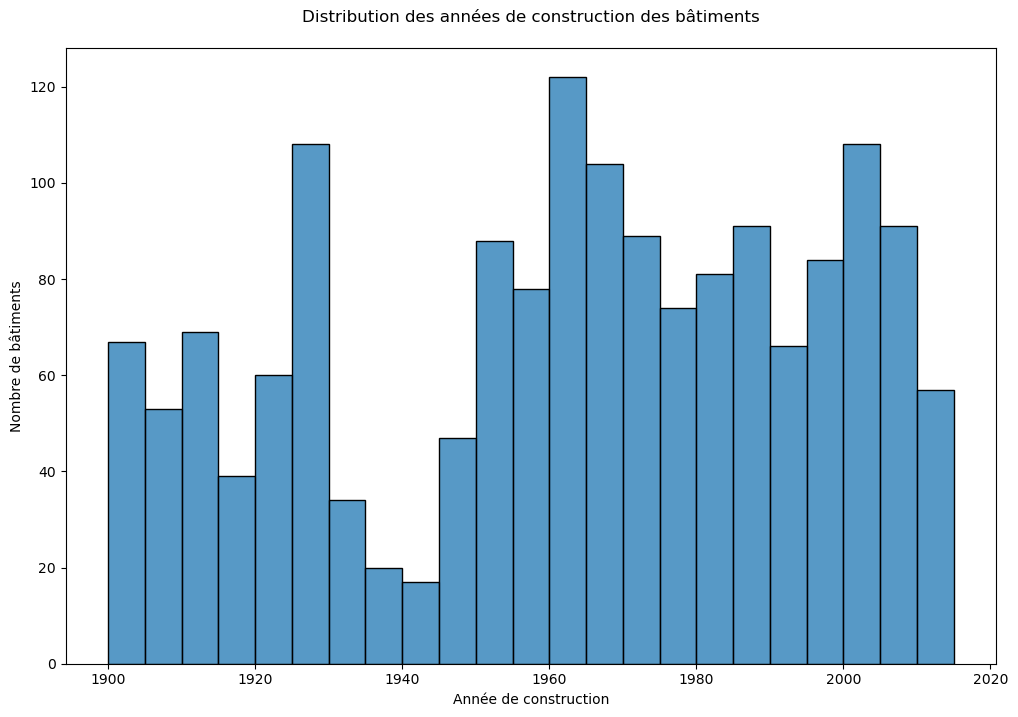

In [92]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data, x='YearBuilt', bins=int((data.YearBuilt.max() - data.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n")
plt.show()

Plus que l'année de construction, il serait intéressant de traiter l'age des bâtiments pour réduire la dispersion des données et lier l'année des relevés. Nous allons donc créer cette nouvelle variable et supprimer l'année de construction :

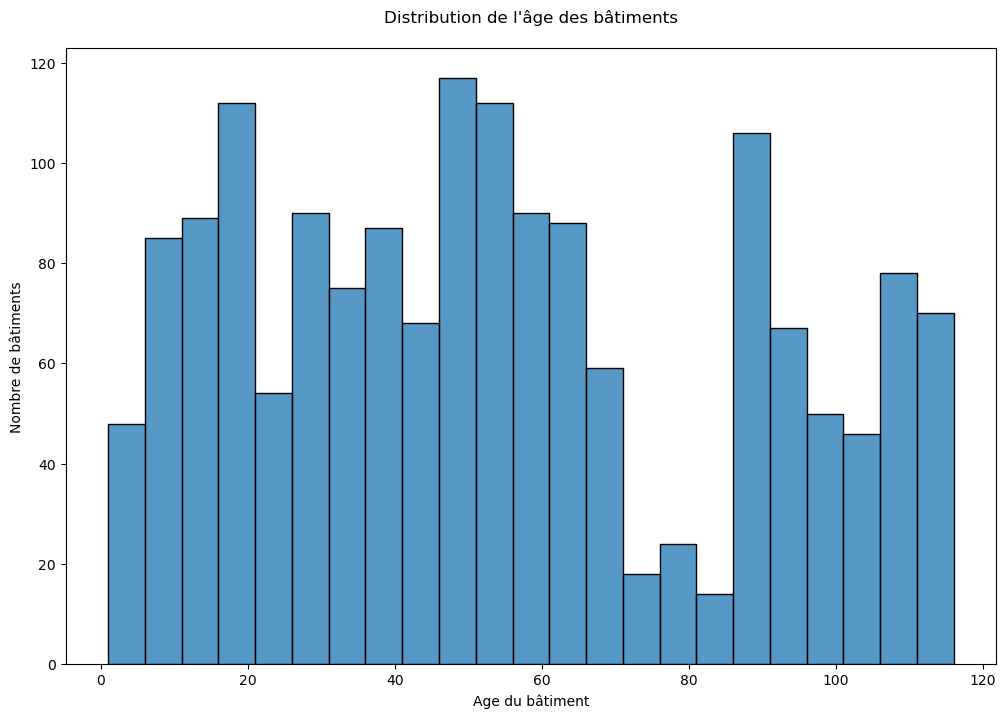

In [93]:
data['BuildingAge'] = data['DataYear'] - data['YearBuilt']
data.drop('YearBuilt', axis=1, inplace=True)

fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data, x='BuildingAge', bins=int((data.BuildingAge.max() - data.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n")
plt.show()

## 3. Les corrélations linéaires

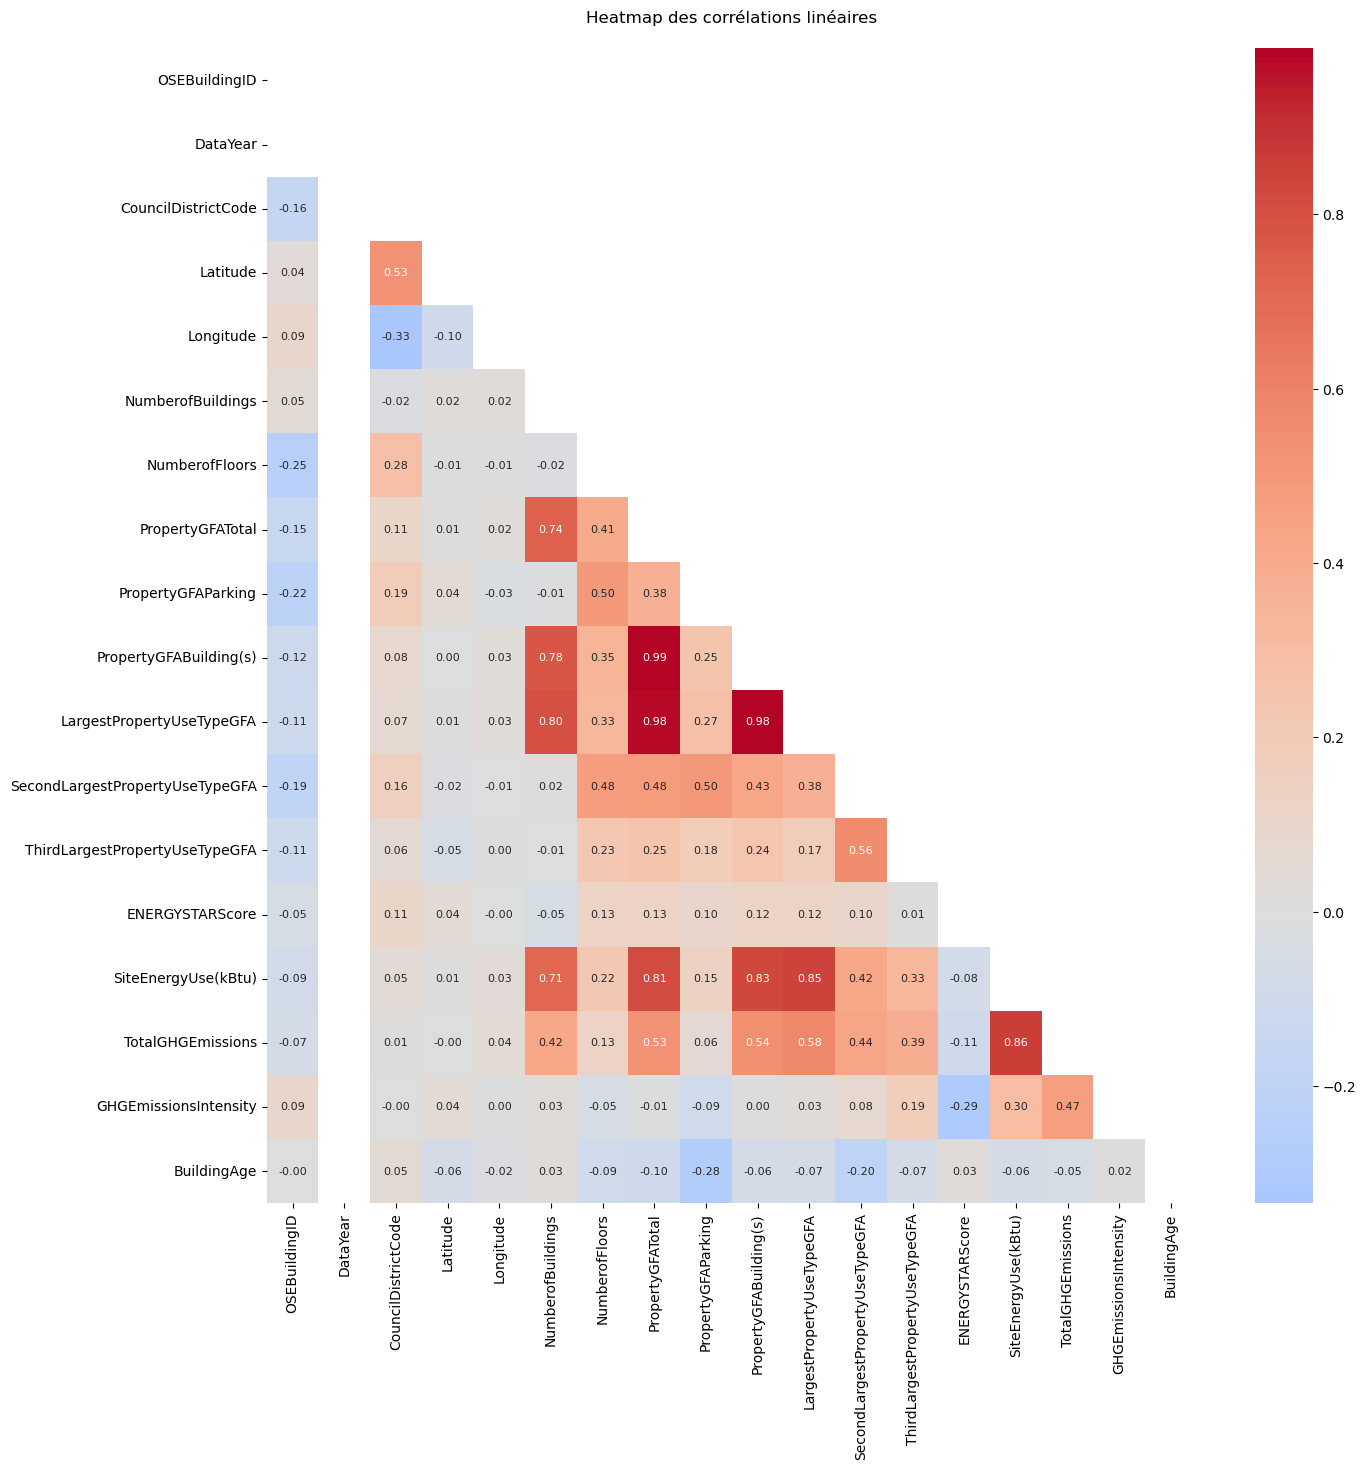

In [94]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n")
plt.show()

Pour les varaibles à prédire TotalGHGEmissions et SiteEnergyUse(kBtu), on remarque des corrélations linéaires quasi similaires avec les variables de relevés (les consommations) mais également avec le nombre de batiments ou d'étages ains que les surfaces au sol.

On remarque sur ce Heatmap de fortes corrélations linéaires entre variables. Ces corrélations peuvent amener des problèmes de colinéarité dans nos futurs modèles. Isolons donc les paires de variables avec des corrélations de Pearson supérieurs à 0.7 :

In [95]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

level_0                    level_1  corr_coeff
20           PropertyGFATotal     PropertyGFABuilding(s)    0.990378
18     PropertyGFABuilding(s)  LargestPropertyUseTypeGFA    0.982422
16           PropertyGFATotal  LargestPropertyUseTypeGFA    0.977646
14          TotalGHGEmissions        SiteEnergyUse(kBtu)    0.860148
12  LargestPropertyUseTypeGFA        SiteEnergyUse(kBtu)    0.846123
10     PropertyGFABuilding(s)        SiteEnergyUse(kBtu)    0.825803
8            PropertyGFATotal        SiteEnergyUse(kBtu)    0.809572
6           NumberofBuildings  LargestPropertyUseTypeGFA    0.800072
4           NumberofBuildings     PropertyGFABuilding(s)    0.775613
2            PropertyGFATotal          NumberofBuildings    0.739235
0         SiteEnergyUse(kBtu)          NumberofBuildings    0.713780

On remarque que les variables suffixées GFA présentent de fortes corrélations avec plusieurs autres variables. Nous allons donc créer de nouvelles variables pour tenter de gommer ces corrélations linéaires :

In [96]:
def split_words(df, column = None):
  list_words = set()
  for word in df[column].str.split(','):
    if isinstance(word, float):
      continue
    list_words = set().union(word, list_words)
  return list(list_words)

list_use_type = split_words(data, 'ListOfAllPropertyUseTypes')
print("Nombre de type d'usages dans la base : {}".format(len(list_use_type)))

Nombre de type d'usages dans la base : 115


Réaliser un OneHotEncoder sur 115 types d'usage ne serait pas oportun.Nous allons donc créer une variable nous donnant le nombre total d'usage du bâtiment, puis supprimer la liste complète des usages :

In [97]:
data['TotalUseTypeNumber'] = [str(word).count(",") + 1 for word in data['ListOfAllPropertyUseTypes'].str.split(',')]
data.drop('ListOfAllPropertyUseTypes', axis=1, inplace=True)

Nous allons à présent convertir les différentes surfaces (Buildings et Parking) en pourcentage de la surface totale.

In [98]:
def search_componant(df, suffix=None):
  componant = []
  for col in df.columns:
      if suffix in col: 
        componant.append(col)
  return componant
gfa_features = search_componant(data, suffix='GFA')
data[['TotalUseTypeNumber'] + gfa_features].head(10)

TotalUseTypeNumber  PropertyGFATotal  PropertyGFAParking  \
0                   1             88434                   0   
1                   3            103566               15064   
2                   1            956110              196718   
3                   1             61320                   0   
4                   3            175580               62000   
5                   1             97288               37198   
6                   1             83008                   0   
7                   1            102761                   0   
8                   1            163984                   0   
9                   1            153163               19279   

   PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
0                   88434                    88434.0   
1                   88502                    83880.0   
2                  759392                   756493.0   
3                   61320                    61320.0   
4                  113580                   123445.0   
5                   60090                    88830.0   
6                   83008                    81352.0   
7                  102761                   102761.0   
8                  163984                   163984.0   
9                  133884                   133884.0   

   SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  
0                              0.0                             0.0  
1                          15064.0                          4622.0  
2                              0.0                             0.0  
3                              0.0                             0.0  
4                          68009.0                             0.0  
5                              0.0                             0.0  
6                              0.0                             0.0  
7                              0.0                             0.0  
8                              0.0                             0.0  
9                              0.0                             0.0

In [99]:
#On calcule les ratios
data['GFABuildingRate'] = (round((data['PropertyGFABuilding(s)'].fillna(0)
                                  /data['PropertyGFATotal'].fillna(0)),5))
data['GFAParkingRate'] = (round((data['PropertyGFAParking'].fillna(0)
                                 /data['PropertyGFATotal'].fillna(0)),5))

In [100]:
#On supprime les variables inutiles
data.drop(['PropertyGFAParking',
           'PropertyGFABuilding(s)'],
         axis=1, inplace=True)

In [101]:
#Surface moyenne par batîment par étage
data['GFAPerBuilding'] = round((data['PropertyGFATotal'] / data['NumberofBuildings']),3)
data['GFAPerFloor'] = round((data['PropertyGFATotal'] / data['NumberofFloors']),3)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1647 non-null   int64  
 1   DataYear                         1647 non-null   int64  
 2   BuildingType                     1647 non-null   object 
 3   PrimaryPropertyType              1647 non-null   object 
 4   PropertyName                     1647 non-null   object 
 5   Address                          1647 non-null   object 
 6   City                             1647 non-null   object 
 7   State                            1647 non-null   object 
 8   ZipCode                          1647 non-null   object 
 9   TaxParcelIdentificationNumber    1647 non-null   object 
 10  CouncilDistrictCode              1647 non-null   int64  
 11  Neighborhood                     1647 non-null   object 
 12  Latitude            

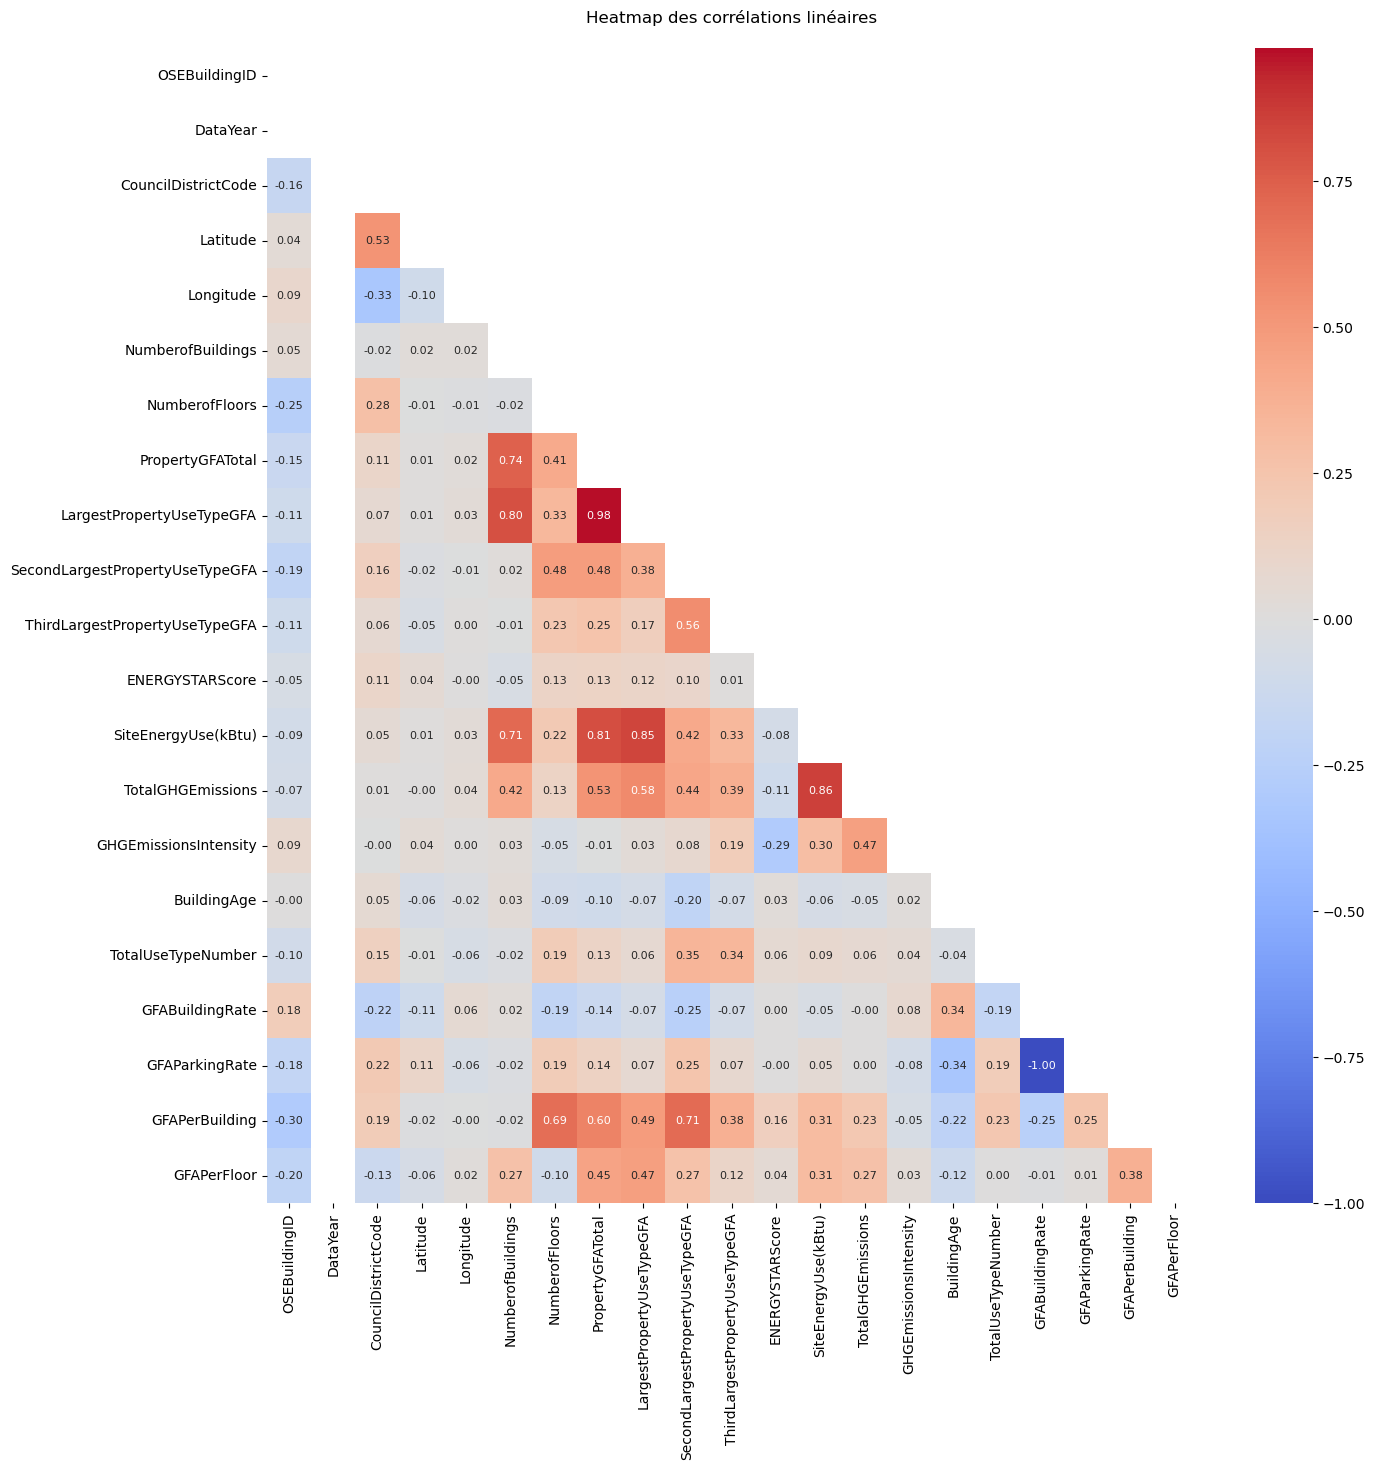

In [103]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n")
plt.show()

In [104]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

level_0                          level_1  corr_coeff
16  LargestPropertyUseTypeGFA                 PropertyGFATotal    0.977646
14        SiteEnergyUse(kBtu)                TotalGHGEmissions    0.860148
12        SiteEnergyUse(kBtu)        LargestPropertyUseTypeGFA    0.846123
10           PropertyGFATotal              SiteEnergyUse(kBtu)    0.809572
8   LargestPropertyUseTypeGFA                NumberofBuildings    0.800072
6            PropertyGFATotal                NumberofBuildings    0.739235
4           NumberofBuildings              SiteEnergyUse(kBtu)    0.713780
2              GFAPerBuilding  SecondLargestPropertyUseTypeGFA    0.705053
0              GFAParkingRate                  GFABuildingRate   -1.000000

Vérification de multicolinéarité avec le VIF (Variance Inflation Factor) : 

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

strong_corr_features = list(set(list(strong_corr['level_0'].values) + list(strong_corr['level_1'].values)))
X = data[strong_corr_features].replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))]
vif_data[vif_data['VIF'] > 5]

feature        VIF
0           PropertyGFATotal  72.326494
1  LargestPropertyUseTypeGFA  50.318300
2        SiteEnergyUse(kBtu)  16.543307
5          NumberofBuildings  11.067920
6          TotalGHGEmissions   7.538403
7             GFAPerBuilding   9.368437

Des scores VIF supérieur à 5 indiquent généralement une forte multicolinéarité. Ces variables fortement corrélées risquent d'impacter nos modèles.
Les features suffixées EUI(kBtu/sf), sont des variables dont les valeurs sont ramenées à la surface par étage. Nous allons les supprimer car nous avons créer des variables pouvant permettre de ramener nos données à l'étage ou au building. Idem pour la variable GHGEmissionsIntensity.

In [106]:
Eui_features = search_componant(data, suffix='EUI(kBtu/sf)') + ['GHGEmissionsIntensity']
data.drop(Eui_features, axis=1, inplace=True)

## Analyse des variables à prédire 

<font color="#337da4"><h4>6. Analyse des variables cibles </h4><a class="anchor" id="section_6"></a>
</font>

Les 2 variables à prédire dans le cadre de notre mission sont :

- TotalGHGEmissions
- SiteEnergyUse(kBtu)
Nous allons donc réaliser quelques analyses exploratoires sur ces features :

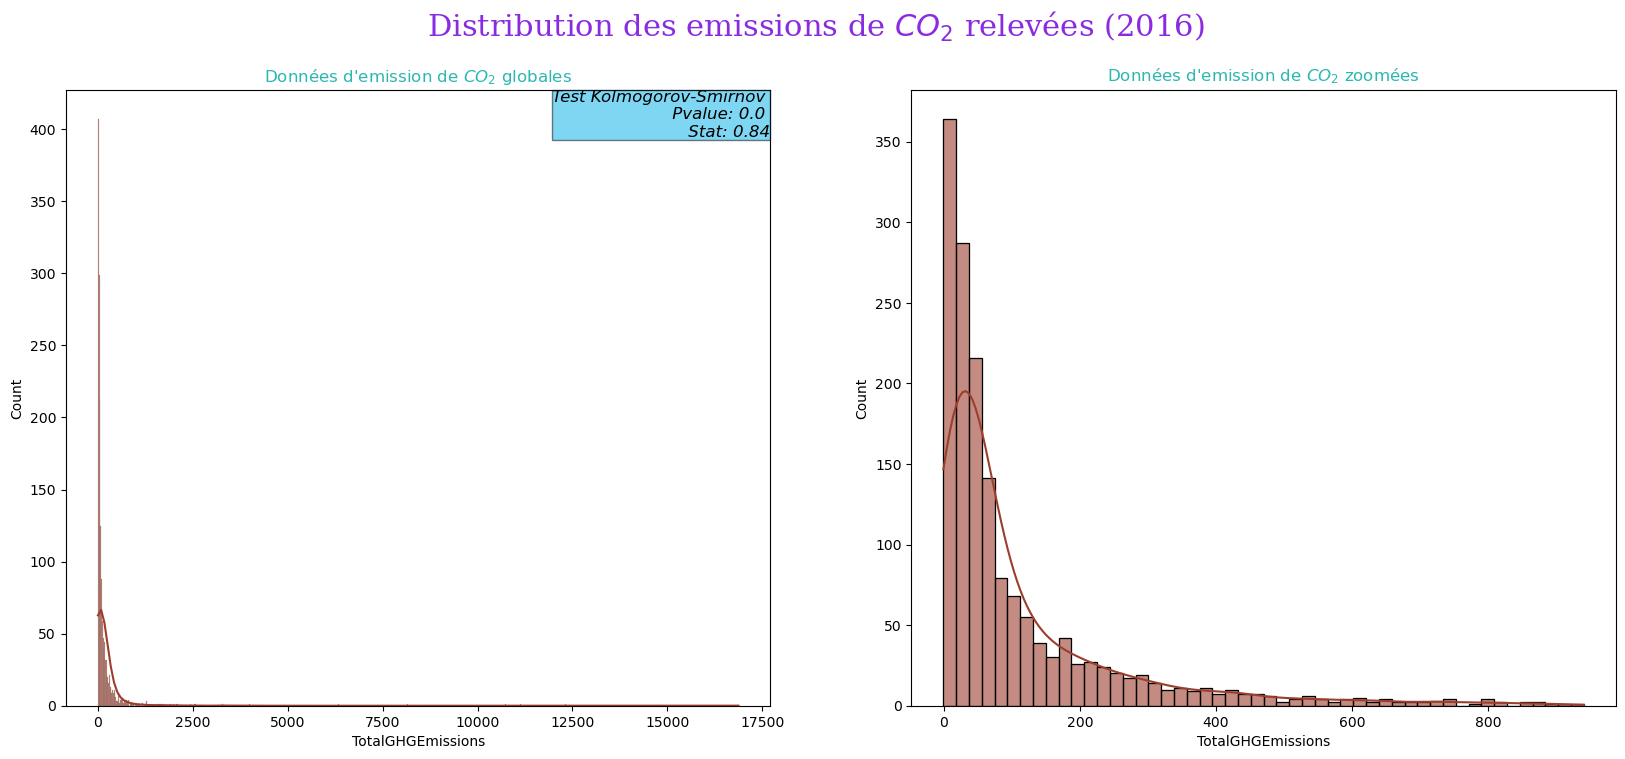

In [110]:
import scipy.stats as stats
font_title = {'family': 'serif',
              'color':  '#8A2BE2',
              'weight': 'bold',
              'fontsize': 20,
             }

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height

sns.histplot(data=data, x="TotalGHGEmissions", kde=True, ax=axes[0], color="#9C3E2D", alpha=0.6)
axes[0].set_title("Données d'emission de $CO_2$ globales", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(data['TotalGHGEmissions'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=data[(data['TotalGHGEmissions']< 1000)], x="TotalGHGEmissions", kde=True, ax=axes[1], color="#9C3E2D", alpha=0.6)
axes[1].set_title("Données d'emission de $CO_2$ zoomées", color='#2cb7b0')

plt.suptitle("Distribution des emissions de $CO_2$ relevées (2016)", 
             fontdict=font_title, fontsize=22)
plt.show()

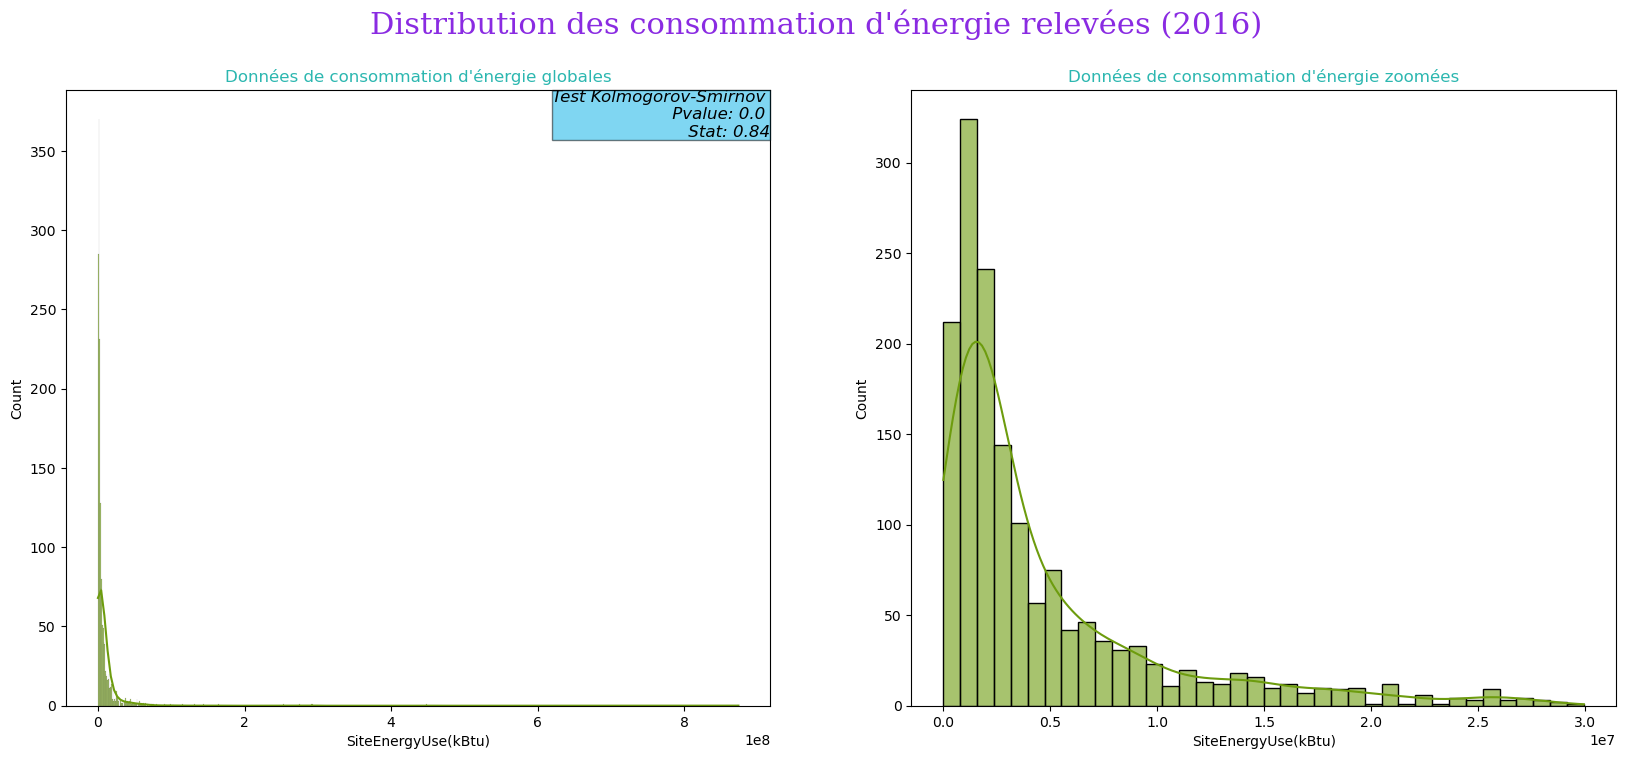

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))

sns.histplot(data=data, x="SiteEnergyUse(kBtu)", kde=True, ax=axes[0], color="#6D9C0E", alpha=0.6)
axes[0].set_title("Données de consommation d'énergie globales", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(data['SiteEnergyUse(kBtu)'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=data[(data['SiteEnergyUse(kBtu)']< 0.3*10**8)], x="SiteEnergyUse(kBtu)", kde=True, ax=axes[1], color="#6D9C0E", alpha=0.6)
axes[1].set_title("Données de consommation d'énergie zoomées", color='#2cb7b0')

plt.suptitle("Distribution des consommation d'énergie relevées (2016)", 
             fontdict=font_title, fontsize=22)
plt.show()

En se basant sur les projections obtenus et les résultats des tests de Kolmogorov-Smirnov (Pvalue < au niveau de test de 5%) on rejette donc l'hypothèse de normalité des distributions de ces variables.

Projettons à présent les scatterplots des distribition de ces 2 variables entre elles :

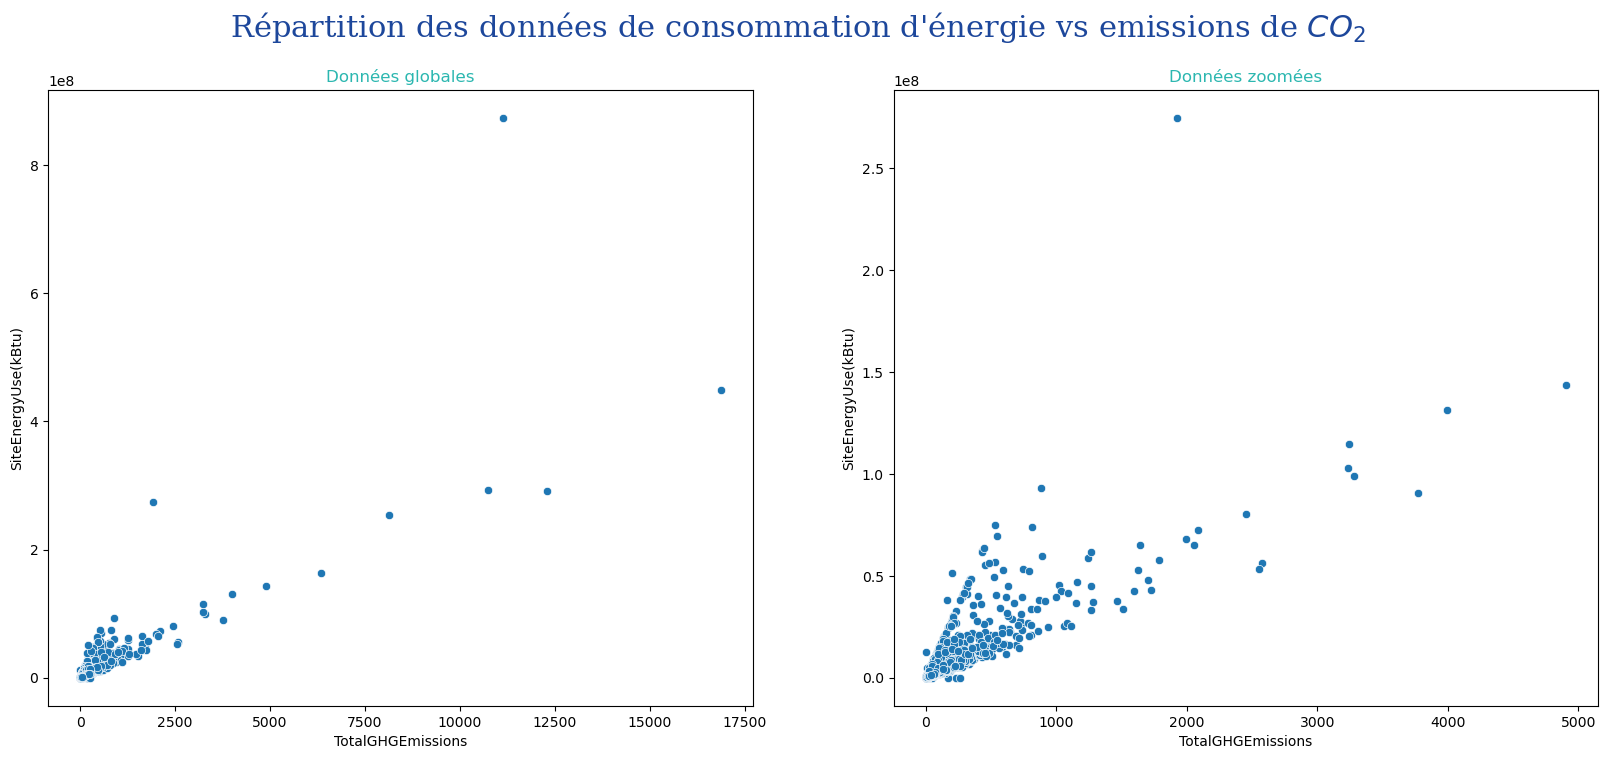

In [114]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'fontsize': 18,
             }

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.scatterplot(data=data[(data['TotalGHGEmissions'] < 5000)], x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition des données de consommation d'énergie vs emissions de $CO_2$", fontdict=font_title, fontsize=22)
plt.show()

On remarque que la répartion des données d'emission de $CO_2$ en fonction de la consommation d'énergie ne suivent pas uniquement une seule droite de régression linéaire.

Regardons à présent si les coordonnées géographiques ont un impact sur les rejets et consommations. Pour cela, afin d'éviter les corrélations fortes entre Latitude et Longitude, nous allons calculer la distance Harversine entre chaque point de coordonnées et le centre de Seattle :

In [115]:
from math import radians, cos, sin, asin, sqrt

#Coordonnées du centre de Seattle
seattle_lat = 47.6062
seattle_lon = -122.3321

def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [116]:
#Calcul des distance au centre de Seattle pour chaque point
data['harvesine_distance'] = [haversine_distance(seattle_lat, seattle_lon, x, y) 
                              for x, y in zip(data.Latitude.astype(float), data.Longitude.astype(float))]

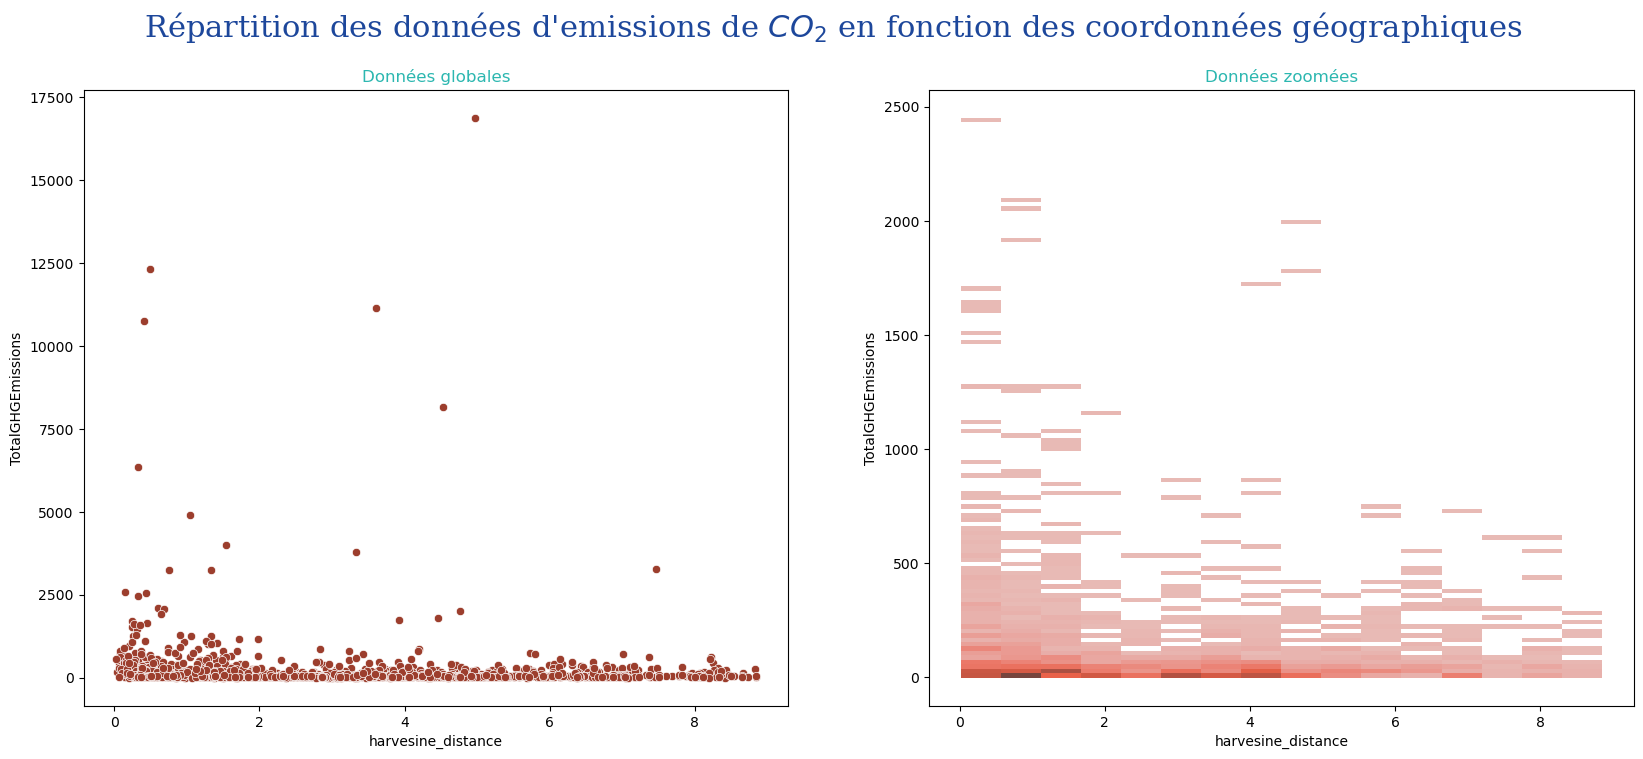

In [117]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, y="TotalGHGEmissions", x="harvesine_distance", color="#9C3E2D", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.histplot(data=data[(data['TotalGHGEmissions'] < 2500)], y="TotalGHGEmissions", 
                x="harvesine_distance", color="#9C3E2D", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition des données d'emissions de $CO_2$ en fonction des coordonnées géographiques", 
             fontdict=font_title, fontsize=22)
plt.show()

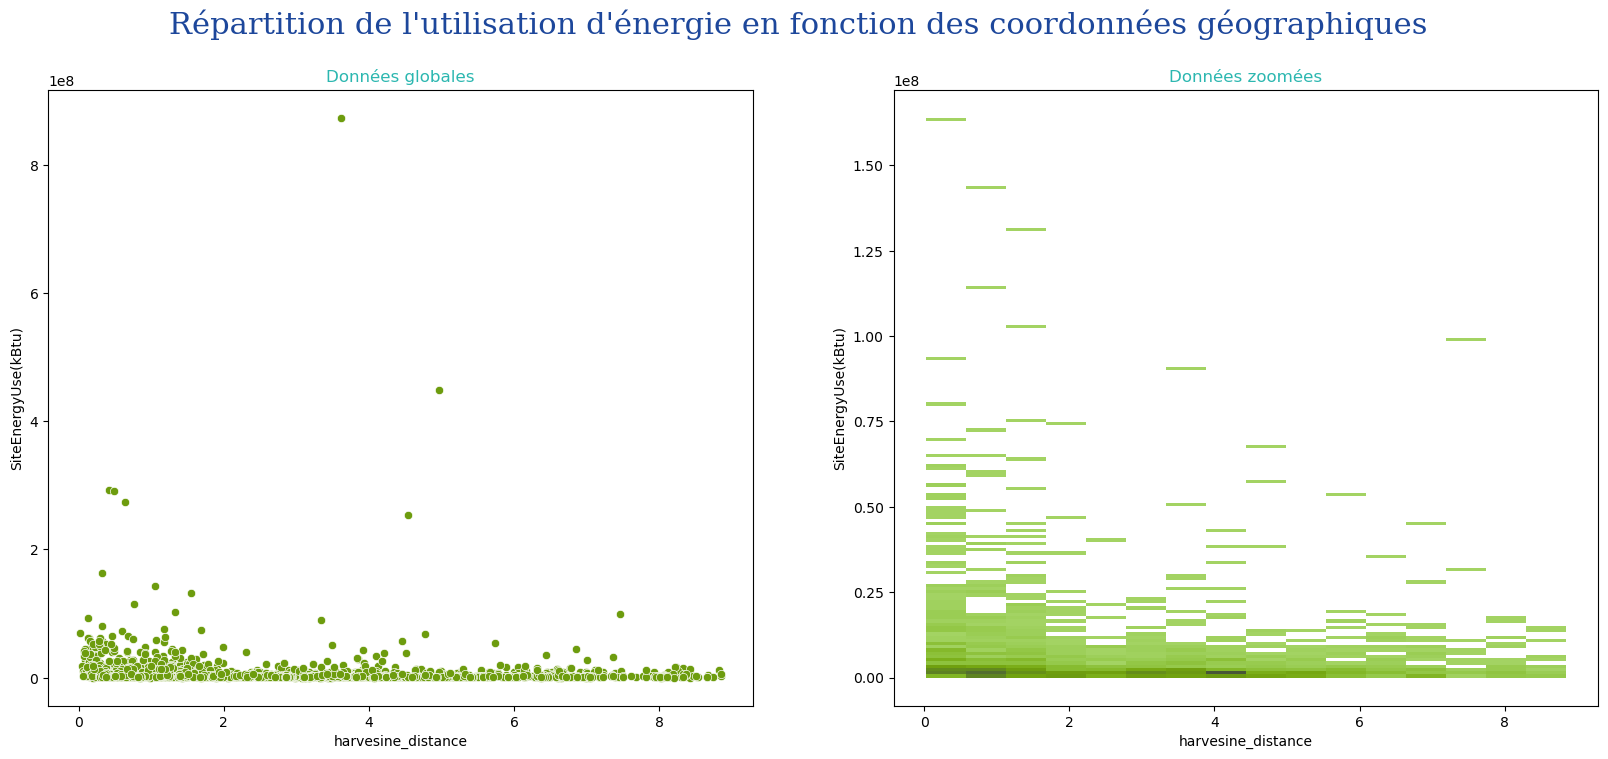

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, y="SiteEnergyUse(kBtu)", x="harvesine_distance", color="#6D9C0E", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.histplot(data=data[(data['SiteEnergyUse(kBtu)'] < 2*10**8)], y="SiteEnergyUse(kBtu)", 
                x="harvesine_distance", color="#6D9C0E", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition de l'utilisation d'énergie en fonction des coordonnées géographiques", 
             fontdict=font_title, fontsize=22)
plt.show()

En regardant ces projections, il semble que les coordonnées géographiques (donc les adresses des bâtiments) puissent avoir un impact sur les consommations d'énergie et rejets de $CO_2$.

D'autre part, la latitude et la longitude étant 2 variables fortement corrélées dans notre jeu de données, nous allons supprimer ces 2 colonnes pour conserver uniquement ce point de coordonnée unique Harvesine.

Nous allons à présent regarder la répartition de ces 2 variables en fonction du type de bâtiment.

In [119]:
#Effacer latitude et longitude
data.drop(['Latitude', 'Longitude'], axis=1)

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
1642          50222      2016  Nonresidential COS              Office   
1643          50223      2016  Nonresidential COS               Other   
1644          50224      2016  Nonresidential COS               Other   
1645          50225      2016  Nonresidential COS  Mixed Use Property   
1646          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
1642                Horticulture building  1600 S Dakota St  Seattle    WA   
1643  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
1644                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
1645          South Park Community Center    8319 8th Ave S  Seattle    WA   
1646          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0     98101.0                    0659000030                    7   
1     98101.0                    0659000220                    7   
2     98101.0                    0659000475                    7   
3     98101.0                    0659000640                    7   
4     98121.0                    0659000970                    7   
...       ...                           ...                  ...   
1642  Unknown                    1624049080                    2   
1643  Unknown                    3558300000                    2   
1644  Unknown                    1794501150                    7   
1645  Unknown                    7883603155                    1   
1646  Unknown                    7857002030                    2   

               Neighborhood  NumberofBuildings  NumberofFloors  \
0                  DOWNTOWN                1.0              12   
1                  DOWNTOWN                1.0              11   
2                  DOWNTOWN                1.0              41   
3                  DOWNTOWN                1.0              10   
4                  DOWNTOWN                1.0              18   
...                     ...                ...             ...   
1642       GREATER DUWAMISH                1.0               1   
1643               DOWNTOWN                1.0               1   
1644  MAGNOLIA / QUEEN ANNE                1.0               1   
1645       GREATER DUWAMISH                1.0               1   
1646       GREATER DUWAMISH                1.0               1   

      PropertyGFATotal LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                88434                  Hotel                    88434.0   
1               103566                  Hotel                    83880.0   
2               956110                  Hotel                   756493.0   
3                61320                  Hotel                    61320.0   
4               175580                  Hotel                   123445.0   
...                ...                    ...                        ...   
1642             12294                 Office     

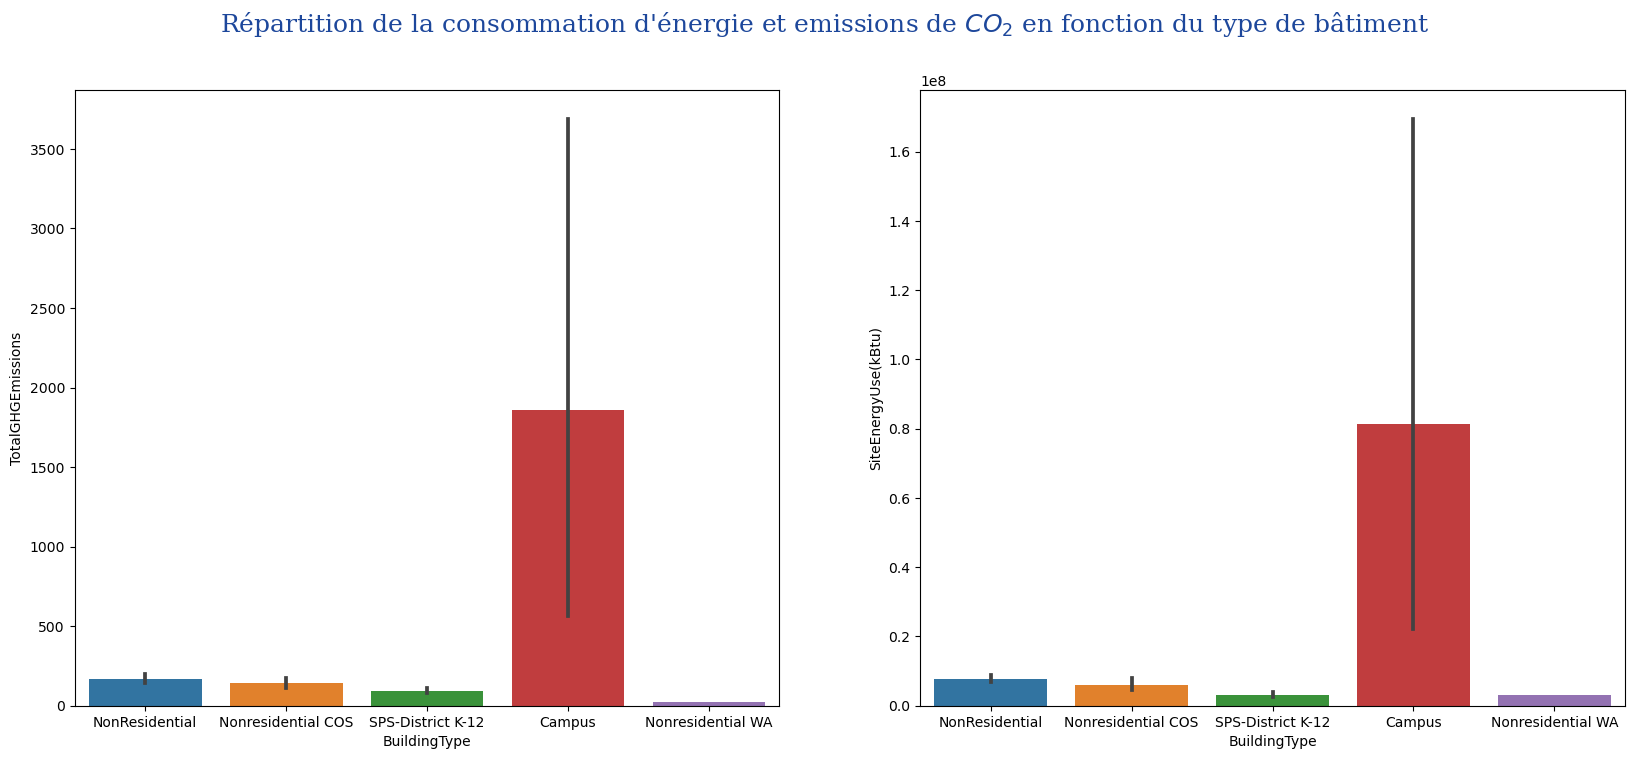

In [120]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.barplot(x='BuildingType',y='TotalGHGEmissions',data=data, ax=axes[0])
sns.barplot(x='BuildingType',y='SiteEnergyUse(kBtu)',data=data, ax=axes[1])
plt.suptitle("Répartition de la consommation d'énergie et emissions de $CO_2$ en fonction du type de bâtiment", 
             fontdict=font_title, fontsize=18)
plt.show()

Sur ces diagrammes en barre, les campus se démarquent largement en terme de consommation et de rejets de $CO_2$. Regardons à présent si l'âge des bâtiments a un impact sur les émissions de $CO_2$ :

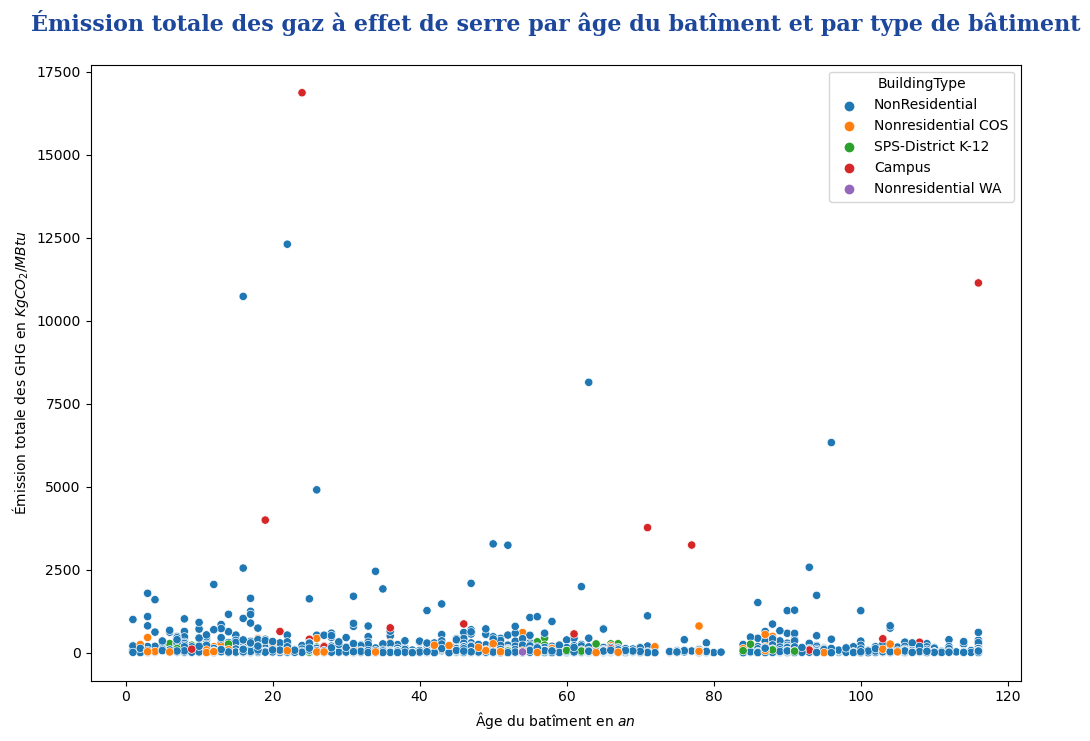

In [123]:
#figure Émissions GHG en fonction du Building Age
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x='BuildingAge', y='TotalGHGEmissions', hue='BuildingType')
plt.title(f"Émission totale des gaz à effet de serre par âge du batîment et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.xlabel('Âge du batîment en $an$')
plt.ylabel('Émission totale des GHG en $Kg CO_2 /MBtu$')
plt.show()

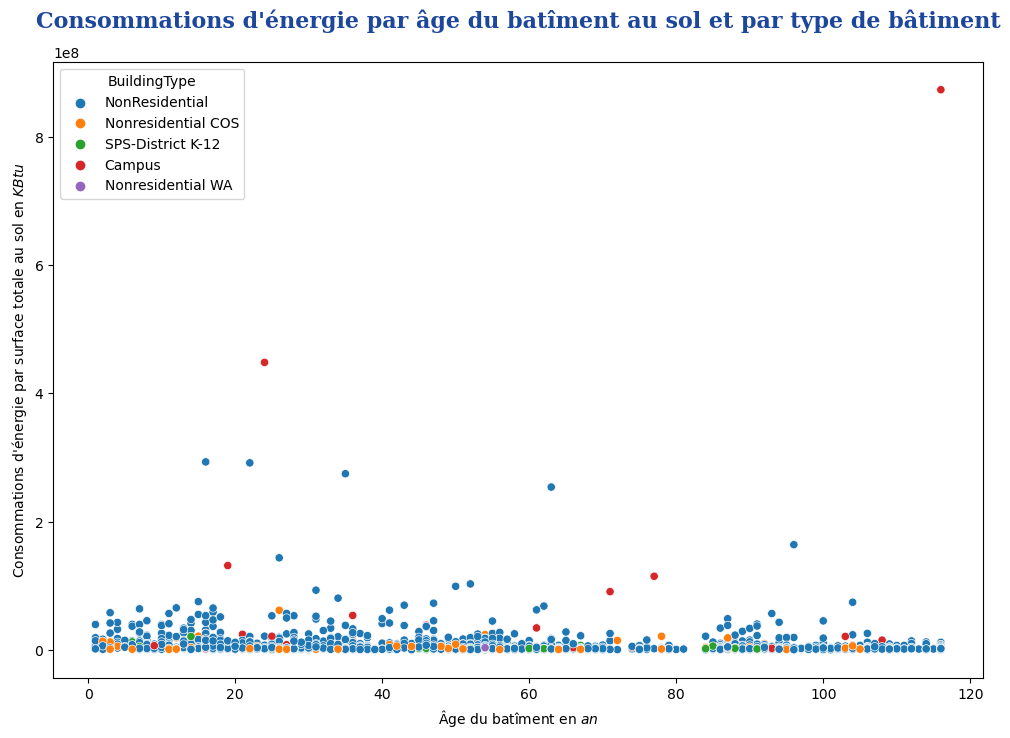

In [124]:
#figure Consommation d'énergie en fonction du BuildingAge
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x='BuildingAge', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommations d'énergie par âge du batîment au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.xlabel('Âge du batîment en $an$')
plt.ylabel("Consommations d'énergie par surface totale au sol en $KBtu$")
plt.show()

La distribution des émissions ou de la consommation apparaît comme étant homogène en fonction de l'âge du batîment. Cepant, on constante que les campus sont très consommateurs et émettent beaucoup de gaz à effet de serre. 

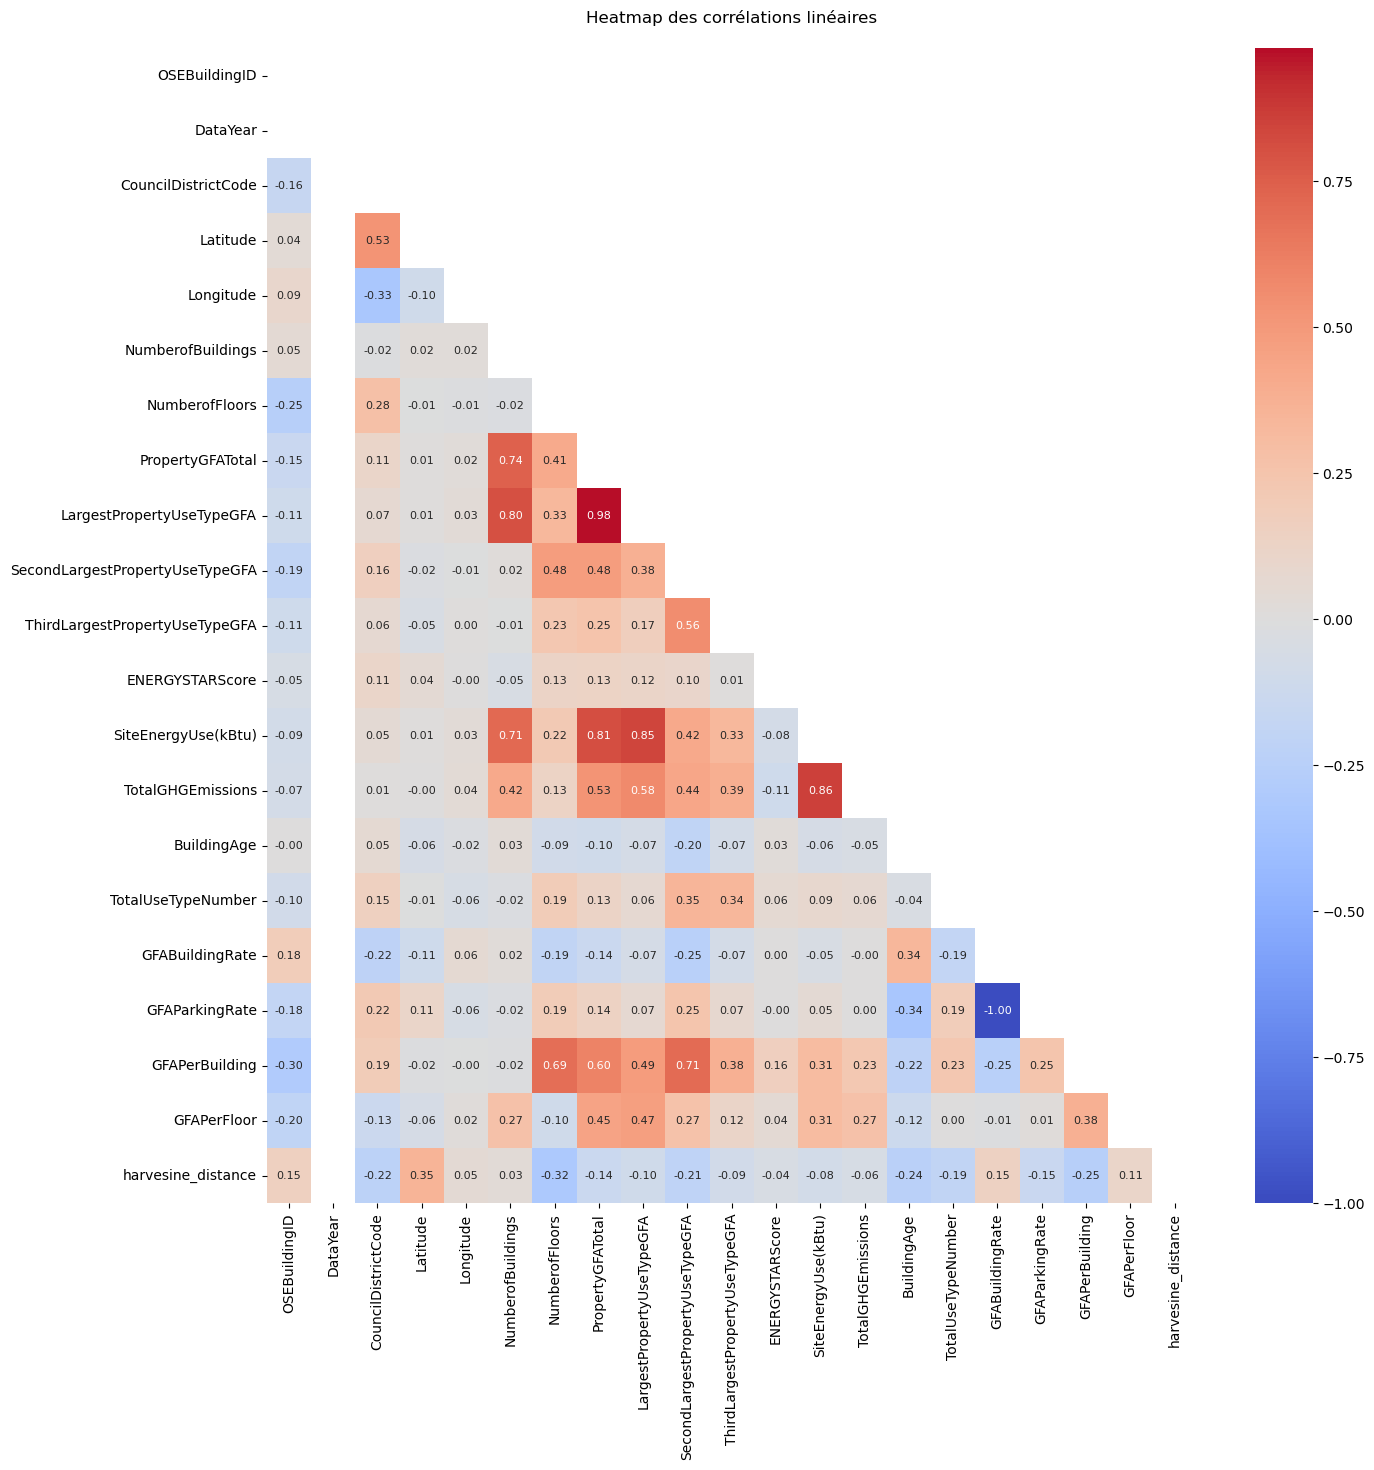

In [125]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n")
plt.show()

In [126]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

level_0                    level_1  corr_coeff
16        LargestPropertyUseTypeGFA           PropertyGFATotal    0.977646
14              SiteEnergyUse(kBtu)          TotalGHGEmissions    0.860148
12              SiteEnergyUse(kBtu)  LargestPropertyUseTypeGFA    0.846123
10                 PropertyGFATotal        SiteEnergyUse(kBtu)    0.809572
8         LargestPropertyUseTypeGFA          NumberofBuildings    0.800072
6                  PropertyGFATotal          NumberofBuildings    0.739235
4               SiteEnergyUse(kBtu)          NumberofBuildings    0.713780
2   SecondLargestPropertyUseTypeGFA             GFAPerBuilding    0.705053
0                   GFABuildingRate             GFAParkingRate   -1.000000

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

strong_corr_features = list(set(list(strong_corr['level_0'].values) + list(strong_corr['level_1'].values)))
X = data[strong_corr_features].replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))]
vif_data[vif_data['VIF'] > 5]

feature        VIF
0           PropertyGFATotal  72.326494
1  LargestPropertyUseTypeGFA  50.318300
2        SiteEnergyUse(kBtu)  16.543307
5          NumberofBuildings  11.067920
6          TotalGHGEmissions   7.538403
7             GFAPerBuilding   9.368437

In [109]:
data.to_csv('data_projet_4.csv',index=False)

Nous allons maintenant pouvoir traiter séparément chaque variable cible et choisir le modèle approprié pour chacune des variables cibles dans les 2 prochains notebooks. 